## Setup, Loading Data and CDFs

In [1]:
DATA_NAME = 'pastis-full' 
TRANSFORM = 'gabor'
CHANNEL = ''

In [2]:
path_list = DATA_NAME.split("-") + TRANSFORM.split("-")
if CHANNEL:
    path_list.append(CHANNEL)
print(f"Name the notebook:\n{'_'.join(path_list[::-1])}.ipynb")
FULL_DATA_NAME='-'.join(path_list)

Name the notebook:
gabor_full_pastis.ipynb


In [ ]:
import git
from pathlib import Path
import os
import pandas as pd

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
CWD = os.path.join(ROOT_DIR, "results", "case-studies", *path_list)

assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)

GROUP = 'layer' if TRANSFORM.split("-")[0] == 'wavelet' else ('band' if TRANSFORM.split("-")[0] == 'fourier' else 'filter_idx')
RERUN = False
SKIP_OPTIMIZE_STEP = False
CWD

FileNotFoundError: [Errno 2] No such file or directory: '/Users/michaelmurphy/Documents/GitHub/hierarchical-bayesian-model-validation/results/case-studies/pastis/full/gabor/CSVs'

In [ ]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
from learned import *
os.chdir(CWD)
np.random.seed(0)

In [ ]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{FULL_DATA_NAME}-size.pickle'))
nonskewed_df = pd.read_csv(os.path.join(ROOT_DIR, 'learned-filters', 'nonskewed_filter_idxs_df.csv')).set_index(['dataset', 'num_images', 'num_bootstrap'])
nonskewed_filter_idxs = eval(nonskewed_df.loc[DATA_NAME].sort_values('num_images', ascending=False)['nonskewed_filter_idxs'].iloc[0])

# map of filter index to tuple of filter parameters (wave_number, aspect_ratio, frequency)
filter_group_map = (pd.read_csv(os.path.join(ROOT_DIR, "gabor", "gabor_full.csv"), index_col="index")
       .loc[:, ["wave_number", "aspect_ratio", "frequency"]]
       .apply(tuple, axis=1)
       .to_dict())

filter_group_map

{3: 'single_edge',
 6: 'single_edge',
 10: 'single_edge',
 11: 'single_edge',
 12: 'single_edge',
 13: 'single_edge',
 14: 'single_edge',
 23: 'single_edge',
 24: 'single_edge',
 28: 'single_edge',
 29: 'single_edge',
 30: 'single_edge',
 32: 'single_edge',
 34: 'single_edge',
 43: 'single_edge',
 48: 'single_edge',
 49: 'single_edge',
 50: 'single_edge',
 55: 'single_edge',
 57: 'single_edge',
 9: 'multi_edge',
 16: 'multi_edge',
 18: 'multi_edge',
 22: 'multi_edge',
 25: 'multi_edge',
 27: 'multi_edge',
 33: 'multi_edge',
 41: 'multi_edge',
 54: 'multi_edge',
 63: 'multi_edge',
 21: 'eye',
 31: 'eye',
 37: 'eye',
 39: 'eye',
 45: 'eye',
 46: 'eye',
 0: 'dual_color',
 2: 'dual_color',
 4: 'dual_color',
 5: 'dual_color',
 17: 'dual_color',
 20: 'dual_color',
 26: 'dual_color',
 38: 'dual_color',
 42: 'dual_color',
 44: 'dual_color',
 47: 'dual_color',
 56: 'dual_color',
 59: 'dual_color',
 7: 'inside_out',
 15: 'inside_out',
 19: 'inside_out',
 35: 'inside_out',
 40: 'inside_out',
 51:

In [ ]:
if 'fourier' in TRANSFORM:
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
elif 'wavelet' in TRANSFORM:
    GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)
elif 'learned' in TRANSFORM: 
    GROUPS = nonskewed_filter_idxs # can set to filter_group_map.keys() to include all prepared filters

cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = sorted([os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)])
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[:6]: # TODO For quick testing purposes. Currently excluding 20000 CDFs. Use cdfs_list[5:6] to access CDFs/_test
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # TODO For quick testing purposes
group_total_samples

{0: 78151680,
 1: 78151680,
 2: 78151680,
 3: 78151680,
 4: 78151680,
 5: 78151680,
 6: 78151680,
 7: 78151680,
 8: 78151680,
 9: 78151680,
 10: 78151680,
 11: 78151680,
 12: 78151680,
 13: 78151680,
 14: 78151680,
 15: 78151680,
 16: 78151680,
 17: 78151680,
 18: 78151680,
 19: 78151680,
 20: 78151680,
 21: 78151680,
 22: 78151680,
 23: 78151680,
 24: 78151680,
 25: 78151680,
 26: 78151680,
 27: 78151680,
 28: 78151680,
 29: 78151680,
 30: 78151680,
 31: 78151680,
 32: 78151680,
 33: 78151680,
 34: 78151680,
 35: 78151680,
 36: 78151680,
 37: 78151680,
 38: 78151680,
 39: 78151680,
 40: 78151680,
 41: 78151680,
 42: 78151680,
 43: 78151680,
 44: 78151680,
 45: 78151680,
 46: 78151680,
 47: 78151680,
 48: 78151680,
 49: 78151680,
 50: 78151680,
 51: 78151680,
 52: 78151680,
 53: 78151680,
 54: 78151680,
 55: 78151680,
 56: 78151680,
 57: 78151680,
 58: 78151680,
 59: 78151680,
 60: 78151680,
 61: 78151680,
 62: 78151680,
 63: 78151680}

Running 12760 CDFs


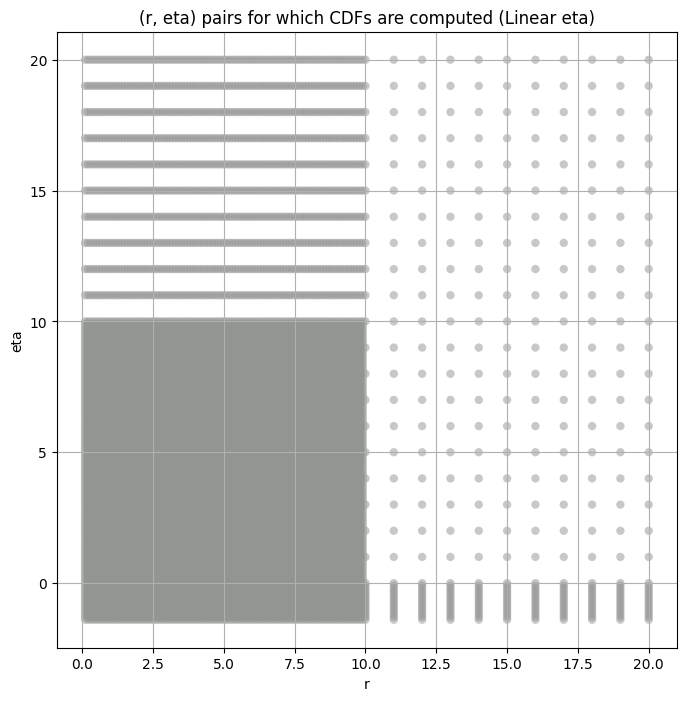

(r,eta),cdf    r  eta  \
0  ((0.1, -1.4), <scipy.interpolate._fitpack2.Int...  0.1 -1.4   
1  ((0.1, -1.3), <scipy.interpolate._fitpack2.Int...  0.1 -1.3   
2  ((0.1, -1.2), <scipy.interpolate._fitpack2.Int...  0.1 -1.2   
3  ((0.1, -1.1), <scipy.interpolate._fitpack2.Int...  0.1 -1.1   
4  ((0.1, -1.0), <scipy.interpolate._fitpack2.Int...  0.1 -1.0   

                                                 cdf      variance  \
0  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.628800e+06   
1  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.991680e+07   
2  <scipy.interpolate._fitpack2.InterpolatedUniva...  2.395008e+08   
3  <scipy.interpolate._fitpack2.InterpolatedUniva...  1.037837e+09   
4  <scipy.interpolate._fitpack2.InterpolatedUniva...  3.632429e+09   

        kurtosis  
0  554265.000000  
1   96192.272727  
2   29390.000000  
3   11997.692308  
4    5874.890110

In [36]:
warnings.filterwarnings('ignore', category=RuntimeWarning)

all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
fine_cdfs_df = all_cdfs_df.copy()
all_cdfs_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 1) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 1) == all_cdfs_df['eta'])]
all_cdfs_df = all_cdfs_df.reset_index(drop=True)
all_cdfs = {x[0] : x[1] for x in all_cdfs_df["(r,eta),cdf"]}
                                             
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
temp_cdf = all_cdfs_df
print(f"Running {all_cdfs_df.shape[0]} CDFs")
create_scatter_plot(all_cdfs_df);
all_cdfs_df.head()

## Bootstrapping the Variance and Kurtosis

In [40]:
n_bootstrap = int(1e3) # TODO For quick testing purposes
bootstrap_size = int(1e3) # TODO For quick testing purposes
ci = 0.99

In [68]:
bootstrap_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))
master_df_var_kurt_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if True or not master_df_var_kurt_path.exists(): # TODO For quick testing purposes
    for group in GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]
        master_df.loc[group, 'filter_group'] = filter_group_map[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(master_df_var_kurt_path, index_col=GROUP)
var_kurt_df = pd.read_csv(bootstrap_path, index_col=GROUP)
master_df

Filter_idx 2


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 3


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 4


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 5


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 6


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 9


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 10


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 11


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 12


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 13


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 16


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 17


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 18


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 20


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 22


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 24


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 25


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 27


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 30


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 33


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 34


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 38


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 41


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 42


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 44


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 47


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 48


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 49


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 50


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 54


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 55


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 56


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 57


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 59


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 60


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 61


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 62


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Filter_idx 63


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

obs_var  var_lower  var_upper   obs_kurt  kurt_lower  \
filter_idx                                                           
2           34.369506  25.256816  47.360156  12.809655    5.447172   
3            9.211916   6.790604  14.459615  18.242905    5.008751   
4           38.920789  30.048795  50.947009   8.496136    3.841664   
5           27.970494  22.457385  35.296358   6.381212    2.885882   
6           15.521845  12.116136  21.261423   8.538402    3.058768   
9            4.317211   3.049023   6.971350  22.310000    5.096953   
10          11.440036   8.737222  16.718910  11.033457    3.862855   
11          14.347531  11.015514  19.975624  11.965410    4.335957   
12           9.335676   6.793059  14.750361  15.951739    4.353205   
13          11.160018   8.183312  16.845016  17.105435    4.428445   
16           8.163742   6.156236  13.550692  19.376951    4.451663   
17          23.045648  17.411424  30.359458   8.452885    4.403670   
18           7.202971   5.133667  11.302398  20.105969    4.891826   
20          35.028681  25.706125  45.727576  10.073999    4.774496   
22           8.077166   6.213862  12.670004  17.238976    4.123043   
24          10.146336   7.193843  16.692011  20.697992    5.370673   
25           4.769784   3.144222   8.727300  26.282440    6.043107   
27           5.222127   3.797728   9.423113  21.987287    5.194206   
30           9.075805   6.467205  15.513135  20.403324    5.161995   
33           6.794106   4.856995  11.210907  19.508541    5.403546   
34           8.665593   6.320149  13.211435  17.288806    5.079774   
38          26.123849  19.912805  34.528796  11.346393    4.597611   
41          10.190199   7.426362  16.380834  17.399572    5.062708   
42          31.897779  22.209779  43.735035  16.700681    7.769575   
44          24.231690  17.964223  34.352679  14.756328    4.958938   
47          22.210125  17.544791  28.108367   7.521260    3.480883   
48           6.889047   5.091734  10.389678  17.715041    5.301384   
49          24.390207  18.312196  32.911048  10.321610    3.954023   
50          16.650869  12.976042  22.488178   9.637120    3.812501   
54           3.879771   2.649966   6.933029  28.982914    6.251733   
55          10.486008   7.715758  17.234135  18.340766    4.956145   
56          29.517911  22.073882  39.475340  10.623308    4.690606   
57          12.287432   9.262205  18.220756  13.393076    4.138088   
59          29.978300  24.643047  37.694184   6.454924    2.868323   
60           1.251381   0.943173   2.193165  19.603682    3.220721   
61           7.650374   5.633077  10.796050  14.304929    4.312154   
62          22.477930  16.987881  29.282724   9.491768    4.293055   
63           4.819722   3.498467   9.850881  27.452317    5.037405   

            kurt_upper  total_samples filter_group  
filter_idx                                          
2            46.661608     78151680.0   dual_color  
3           145.405833     78151680.0  single_edge  
4            25.849390     78151680.0   dual_color  
5            18.590557     78151680.0   dual_color  
6            71.440596     78151680.0  single_edge  
9           152.905264     78151680.0   multi_edge  
10           95.554275     78151680.0  single_edge  
11           97.966156     78151680.0  single_edge  
12          123.833124     78151680.0  single_edge  
13          100.989046     78151680.0  single_edge  
16          169.933559     78151680.0   multi_edge  
17           24.226872     78151680.0   dual_color  
18          170.501969     78151680.0   multi_edge  
20           25.289031     78151680.0   dual_color  
22          140.594990     78151680.0   multi_edge  
24          171.452491     78151680.0  single_edge  
25          200.421675     78151680.0   multi_edge  
27          124.421149     78151680.0   multi_edge  
30          182.142793     78151680.0  single_edge  
33          150.870472     78151680.0   multi_edge  
34          118.303272     78151680.0  single_e

## Initial Grid Search and Hypothesis Test Plots

In [ ]:
EXCLUDE_CUTOFFS = [0, 50, 100, 200] # TODO For quick testing purposes
SCALE_CAP = 1e5

In [53]:
augmented_var_df_path = Path(os.path.join(CWD, "CSVs", "augmented_var_df.csv"))
augmented_var_df = var_kurt_df[['obs_var']].copy()
augmented_var_df
for val in EXCLUDE_CUTOFFS:
    temp_arr = []
    for group in GROUPS:
        if val != 0:
            temp_arr.append(np.var(group_data_map[group][val:-val]))
        else:
            temp_arr.append(np.var(group_data_map[group]))

    augmented_var_df[f"var_exclude_{val}"] = temp_arr
augmented_var_df

obs_var  var_exclude_0  var_exclude_25  var_exclude_50  \
filter_idx                                                             
2           34.369506      34.369506       32.915840       31.998939   
3            9.211916       9.211916        8.715629        8.468582   
4           38.920789      38.920789       37.655332       36.810488   
5           27.970494      27.970494       27.209793       26.702975   
6           15.521845      15.521845       14.983747       14.681700   
9            4.317211       4.317211        4.033738        3.901497   
10          11.440036      11.440036       10.979885       10.729777   
11          14.347531      14.347531       13.748525       13.413225   
12           9.335676       9.335676        8.869441        8.632091   
13          11.160018      11.160018       10.582718       10.294230   
16           8.163742       8.163742        7.727518        7.523650   
17          23.045648      23.045648       22.346080       21.880304   
18           7.202971       7.202971        6.792726        6.591204   
20          35.028681      35.028681       33.845719       33.028180   
22           8.077166       8.077166        7.656918        7.450556   
24          10.146336      10.146336        9.582705        9.304974   
25           4.769784       4.769784        4.445873        4.288733   
27           5.222127       5.222127        4.903795        4.751531   
30           9.075805       9.075805        8.564153        8.306824   
33           6.794106       6.794106        6.407184        6.215385   
34           8.665593       8.665593        8.198343        7.951084   
38          26.123849      26.123849       25.067683       24.400168   
41          10.190199      10.190199        9.652449        9.377850   
42          31.897779      31.897779       30.382778       29.404645   
44          24.231690      24.231690       23.040086       22.333634   
47          22.210125      22.210125       21.554204       21.111073   
48           6.889047       6.889047        6.524746        6.331467   
49          24.390207      24.390207       23.443656       22.890034   
50          16.650869      16.650869       16.028246       15.661362   
54           3.879771       3.879771        3.583966        3.444134   
55          10.486008      10.486008        9.915727        9.634948   
56          29.517911      29.517911       28.371542       27.663721   
57          12.287432      12.287432       11.738740       11.441947   
59          29.978300      29.978300       29.104002       28.549900   
60           1.251381       1.251381        1.184825        1.154913   
61           7.650374       7.650374        7.274728        7.068759   
62          22.477930      22.477930       21.721934       21.221665   
63           4.819722       4.819722        4.512776        4.373552   

            var_exclude_75  var_exclude_100  var_exclude_150  var_exclude_200  \
filter_idx                                                                      
2                31.238439        30.573252        29.428722        28.452490   
3                 8.270471         8.100310         7.812103         7.568868   
4                36.101879        35.479171        34.400518        33.472269   
5                26.274087        25.893121        25.225452        24.642532   
6                14.431972        14.212991        13.833170        13.504894   
9                 3.799644         3.714074         3.571912         3.453772   
10               10.524975        10.346516        10.039714         9.776994   
11               13.138081        12.897957        12.484475        12.129961   
12                8.440606         8.275304         7.993545         7.754451   
13               10.062321         9.862831         9.524035         9.237576   
16                7.359828         7.218888         6.979163         6.775853   
17               21.484013        21.130318        20.506492        19.959858   

####
Filter_idx  2


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 0 0.0045204958757836256 34.369505961016415


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 25 0.004488318631206911 32.915840303209684


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 50 0.005249271644588216 31.998939094027342


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 75 0.004916263868665283 31.23843858515159


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 100 0.004755093100277108 30.57325152323557


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 150 0.0055046122489125215 29.428722233946697


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 200 0.006636751545203268 28.452489908755016


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 250 0.0064402721756867815 27.59283474463763


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 300 0.006776243169336671 26.820714290734884


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 350 0.007436040466356153 26.117590685615326


  0%|          | 0/12760 [00:00<?, ?it/s]

Finding Minimum after computing 12760 CDFs
2 500 0.008877746302544898 24.313209617220036
Number of samples: 100000, Without approximation : 78151680.0


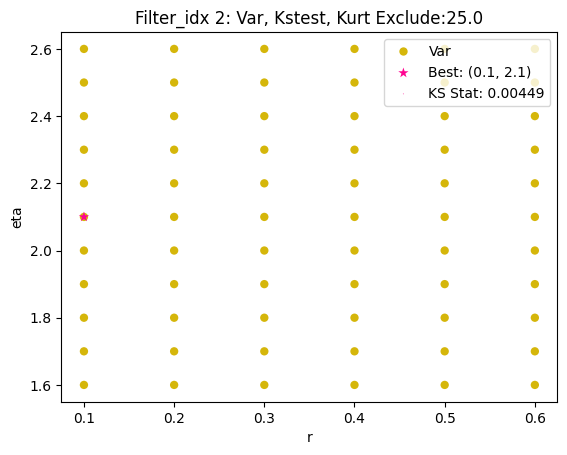

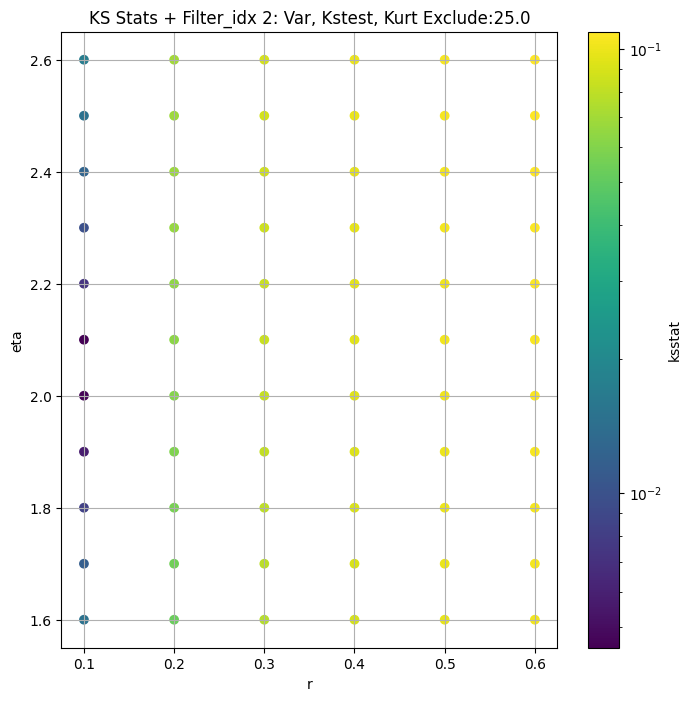

####
Filter_idx  3


  0%|          | 0/12760 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [55]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
rEtaKsstats_dict_path = Path(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))

rEtaKsstats_dict = dict()

if RERUN or not master_df_combo_path.exists():
    sorted_params = sorted(all_cdfs)
    ksstats_dict = dict()

    for i, group in enumerate(GROUPS): # TODO For quick testing purposes
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        if len(sample) == 0:
            continue
        group_cdfs_df = all_cdfs_df.copy()
        master_df.loc[group, 'kstest_stat_initial'] = 1

        for j in range(len(EXCLUDE_CUTOFFS)):

            exclude_cutoff = EXCLUDE_CUTOFFS[j]
            exclude_cutoff = int(exclude_cutoff)

            if exclude_cutoff == 0:
                augmented_var = np.var(group_data_map[group]) 
            else:
                augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])
                if augmented_var == np.var(group_data_map[group]):
                    continue 
                
            group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
            ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True, scales=group_cdfs_df['scale'])
            augmented_var_df.loc[group, f"kstest_stat_{exclude_cutoff}"] = min_stat
            group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] = ksstats
            
            print(group, exclude_cutoff, min_stat, augmented_var)
            
            if (min_stat < master_df.loc[group, 'kstest_stat_initial']) and not np.isclose(min_stat, master_df.loc[group, 'kstest_stat_initial'], 1e-6):
                inital_min_stat = min_stat
                inital_best_param = initial_param
                master_df.loc[group, 'kstest_stat_initial'] = min_stat
                initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
                master_df.loc[group, 'initial_scale'] = initial_scale
                master_df.loc[group, 'initial_exclude_cutoff'] = exclude_cutoff
                master_df.loc[group, 'best_augmented_var'] = augmented_var
        
        ksstats = group_cdfs_df[f"ksstat_exclude_{int(master_df.loc[group, 'initial_exclude_cutoff'])}"]
            
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

        group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
        group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

        group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

        group_dict = {'r' : group_cdfs_df['r'], 'eta' : group_cdfs_df['eta']}
        group_dict.update({f'ksstat_exclude_{exclude_cutoff}' : group_cdfs_df[f'ksstat_exclude_{exclude_cutoff}'] for exclude_cutoff in EXCLUDE_CUTOFFS[:j+1]})
        rEtaKsstats_dict[group] = group_dict

        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdfs_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])} Exclude:{master_df.loc[group, 'initial_exclude_cutoff']}", 
                            target_var = None,
                            best_param = inital_best_param,
                            best_ksstat=inital_min_stat
                            )
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)

        # Optional: 
        # Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdfs_df, var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdfs_df, kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(master_df_combo_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)
    augmented_var_df.to_csv(augmented_var_df_path)

augmented_var_df = pd.read_csv(augmented_var_df_path, index_col=GROUP)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df

## Optimization

In [56]:
master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
master_df[f'best_r'] = master_df['initial_r']
master_df[f'best_eta'] = master_df['initial_eta']
master_df[f'best_scale'] = master_df['initial_scale']
master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

Filter_idx 2


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + 100 = 125, ksstat: 0.006199841597717137, var: 29.975171653843894


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + 75 = 100, ksstat: 0.006152346703617528, var: 30.57325152323557


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + 50 = 75, ksstat: 0.005259717618720849, var: 31.23843858515159


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + 25 = 50, ksstat: 0.004646095855288079, var: 31.998939094027342


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + 0 = 25, ksstat: 0.004020743586633846, var: 32.915840303209684


  0%|          | 0/522 [00:00<?, ?it/s]

Finding Minimum after computing 522 CDFs
filter_idx 2, 25.0 + -25 = 0, ksstat: 0.0042587813689978216, var: 34.369505961016415
Number of samples: 100000, Without approximation : 78151680.0


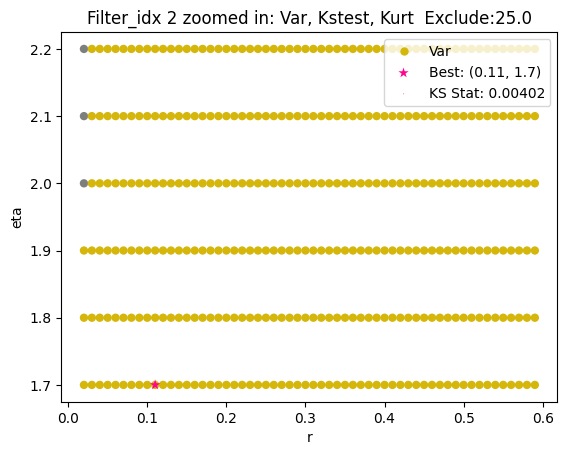

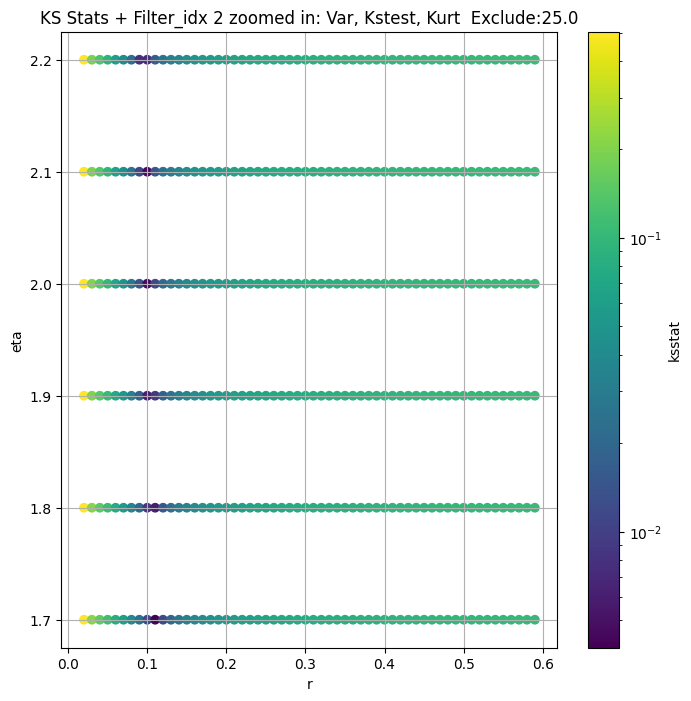

Filter_idx 3


0it [00:00, ?it/s]

Finding Minimum after computing 0 CDFs


ValueError: attempt to get argmin of an empty sequence

In [57]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

NUM_ITERS = dict(zip(GROUPS, [1]*len(GROUPS))) # By default, does one iteration per group
NUM_SAMPLES_OPTIMIZE = 2000
EXCLUDE_CUTOFFS_OPTIMIZE = np.arange(100, -101, -25)

if RERUN or not master_df_optimized_path.exists():

    if SKIP_OPTIMIZE_STEP:

        master_df['kstest_stat_best'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
        master_df[f'best_scale'] = master_df['initial_scale']
        master_df[f'best_exclude_cutoff'] = master_df['initial_exclude_cutoff']

    else:
        for group in GROUPS: # TODO For quick testing purposes
            print(f"{GROUP.capitalize()} {group}")
            master_df.loc[group, 'kstest_stat_best'] = master_df.loc[group, 'kstest_stat_initial']
            master_df.loc[group, 'best_r'] = master_df.loc[group, 'initial_r']
            master_df.loc[group, 'best_eta'] = master_df.loc[group, 'initial_eta']
            master_df.loc[group, 'best_scale'] = master_df.loc[group, 'initial_scale']

            sample = group_data_map[group]
            if len(sample) == 0:
                continue
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            eps = 0.5
            group_cdfs_df = fine_cdfs_df[(np.abs(master_df.loc[group, 'initial_r'] - fine_cdfs_df['r']) < eps) & 
                                        (np.abs(master_df.loc[group, 'initial_eta'] - fine_cdfs_df['eta']) < eps)].reset_index(drop=True)
            group_cdfs = {x[0]:x[1] for x in group_cdfs_df['(r,eta),cdf']}

            for adjust_exclude_cutoff in EXCLUDE_CUTOFFS_OPTIMIZE: # -50, -25, 0, 25, 50
                
                exclude_cutoff = int(max(0, adjust_exclude_cutoff + master_df.loc[group, 'initial_exclude_cutoff']))
                
                if exclude_cutoff == 0:
                    augmented_var = np.var(group_data_map[group])
                else:
                    augmented_var = np.var(group_data_map[group][exclude_cutoff:-exclude_cutoff])                       

                group_cdfs_df['scale'] = np.clip((augmented_var / group_cdfs_df['variance']), 0,  SCALE_CAP)
                ksstats, initial_param, min_stat = gridsearch(sample, group_cdfs, debug=True, scales=group_cdfs_df['scale'])
                
                cutoff_label = generate_cutoff_label(adjust_exclude_cutoff)

                augmented_var_df.loc[group, f"kstest_stat_{cutoff_label}"] = min_stat
                group_cdfs_df[f'ksstat_exclude_{cutoff_label}'] = ksstats
                
                print(f"{GROUP} {group}, {master_df.loc[group, 'initial_exclude_cutoff']} + {adjust_exclude_cutoff} = {exclude_cutoff}, ksstat: {min_stat}, var: {augmented_var}")
                best_adjust = 0

                if min_stat < master_df.loc[group, 'kstest_stat_best']:

                    inital_min_stat = min_stat
                    inital_best_param = initial_param
                    master_df.loc[group, 'kstest_stat_best'] = min_stat
                    initial_scale = group_cdfs_df.loc[(group_cdfs_df["r"] ==  initial_param[0]) & (group_cdfs_df["eta"] ==  initial_param[1])]["scale"].iloc[0]
                    master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'] = initial_param
                    master_df.loc[group, 'best_scale'] = initial_scale
                    master_df.loc[group, 'best_exclude_cutoff'] = exclude_cutoff
                    master_df.loc[group, 'best_augmented_var'] = augmented_var
                    augmented_var_df.loc[group, 'best_augmented_var'] = augmented_var
                    best_adjust = adjust_exclude_cutoff

                if exclude_cutoff == 0:
                    break

            cutoff_label = generate_cutoff_label(best_adjust)
            ksstats = group_cdfs_df[f"ksstat_exclude_{cutoff_label}"]
            
            print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
            
            cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
            master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

            best_scales = np.clip((master_df.loc[group, 'best_augmented_var'] / group_cdfs_df['variance']), 0,  SCALE_CAP)

            group_cdfs_df['variance'] = group_cdfs_df['variance'] * best_scales
            group_cdfs_df['kurtosis'] = group_cdfs_df['kurtosis'] * best_scales

            group_cdfs_df = add_tests_to_df(cdfs_df = group_cdfs_df, group = group, var_kurt_df = master_df, ksstats = ksstats).sort_values(['r', 'eta'])

            group_dict = rEtaKsstats_dict[group]
            group_dict.update({'r_optimize' : group_cdfs_df['r'], 'eta_optimize' : group_cdfs_df['eta'], f'ksstat_exclude_{cutoff_label}' : ksstats})
            rEtaKsstats_dict[group] = group_dict

            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(group_cdfs_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}  Exclude:{master_df.loc[group, 'best_exclude_cutoff']}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']),
                                best_ksstat=master_df.loc[group, 'kstest_stat_best'])
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=100)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', 'initial_exclude_cutoff', 'best_r', 'best_eta', 'best_scale', 'kstest_stat_best', 'best_exclude_cutoff', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))
    augmented_var_df.to_csv(augmented_var_df_path)
    pd.to_pickle(rEtaKsstats_dict, rEtaKsstats_dict_path)

rEtaKsstats_dict = pd.read_pickle(rEtaKsstats_dict_path)
master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
augmented_var_df = pd.read_csv(augmented_var_df_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

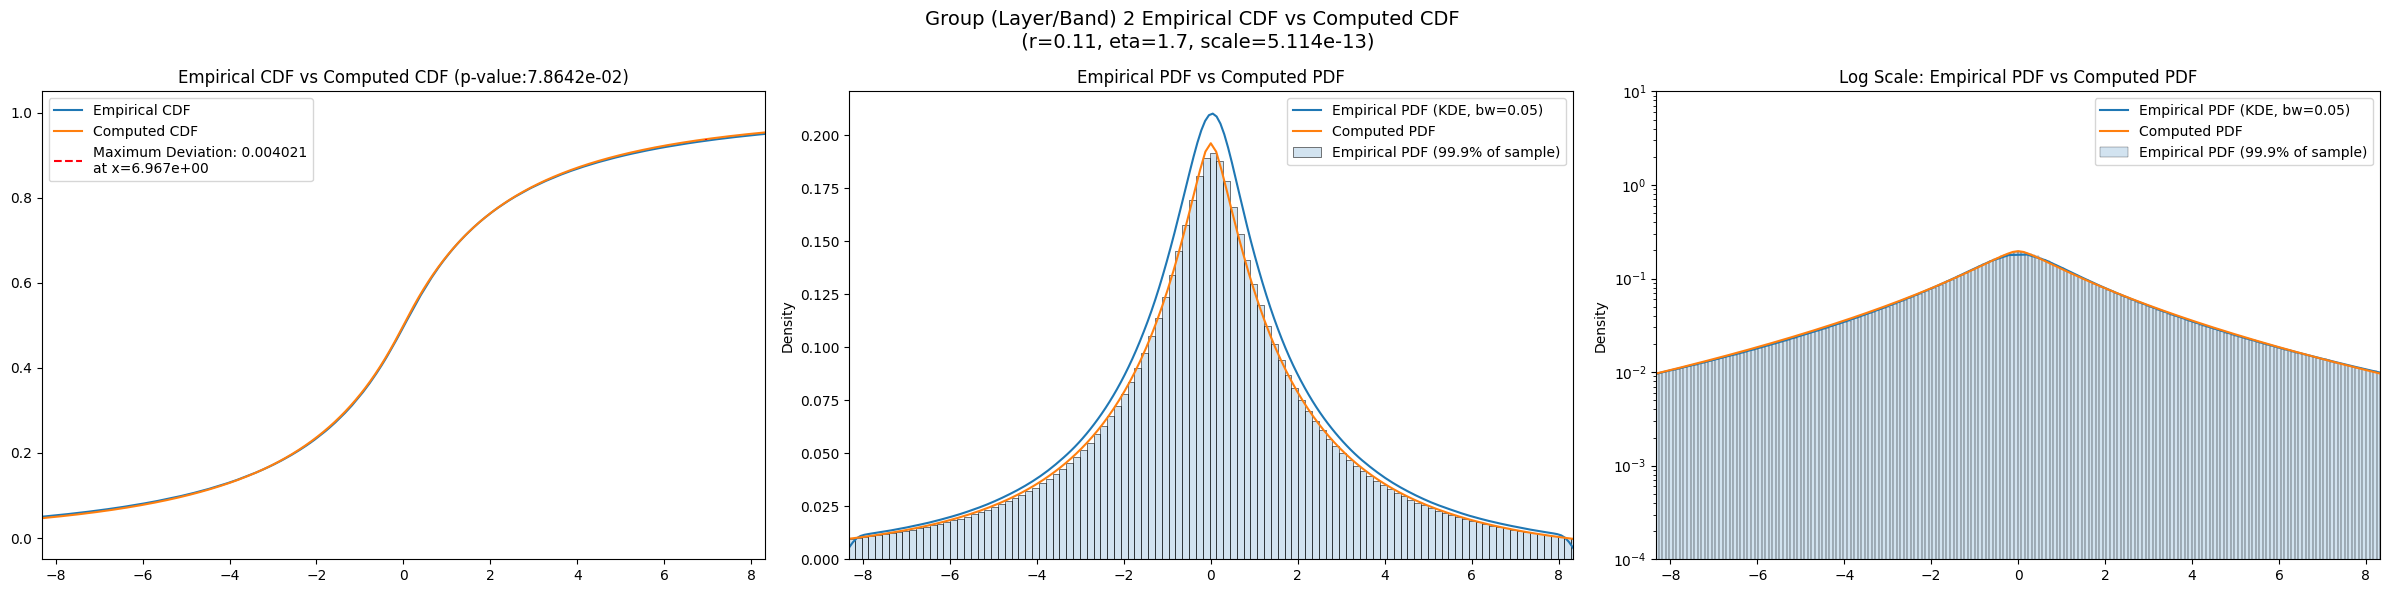

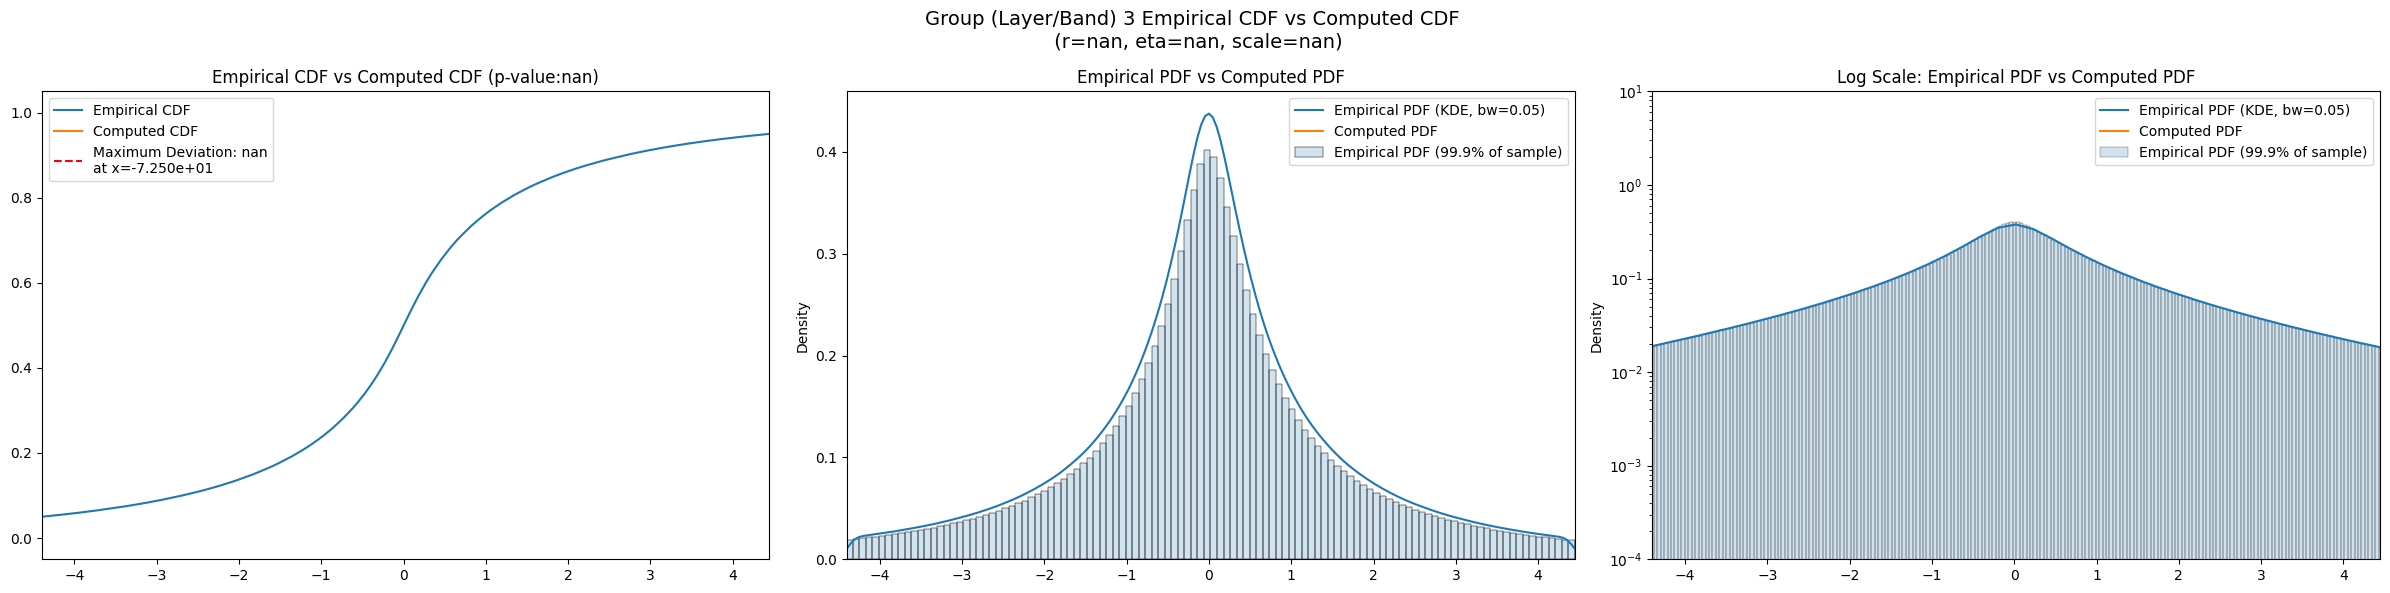

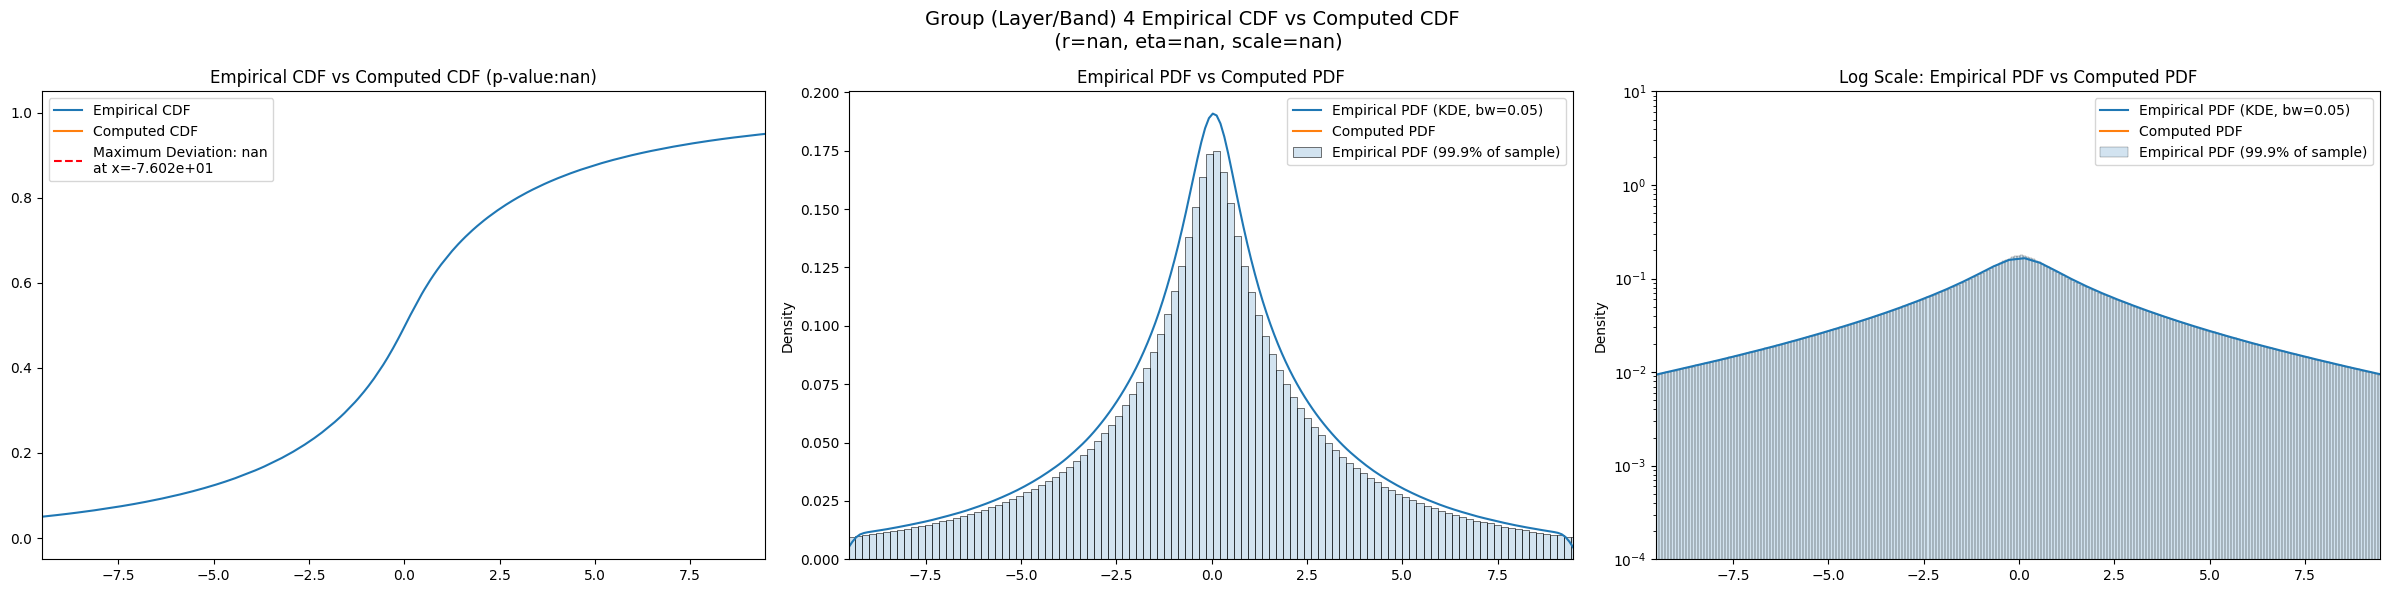

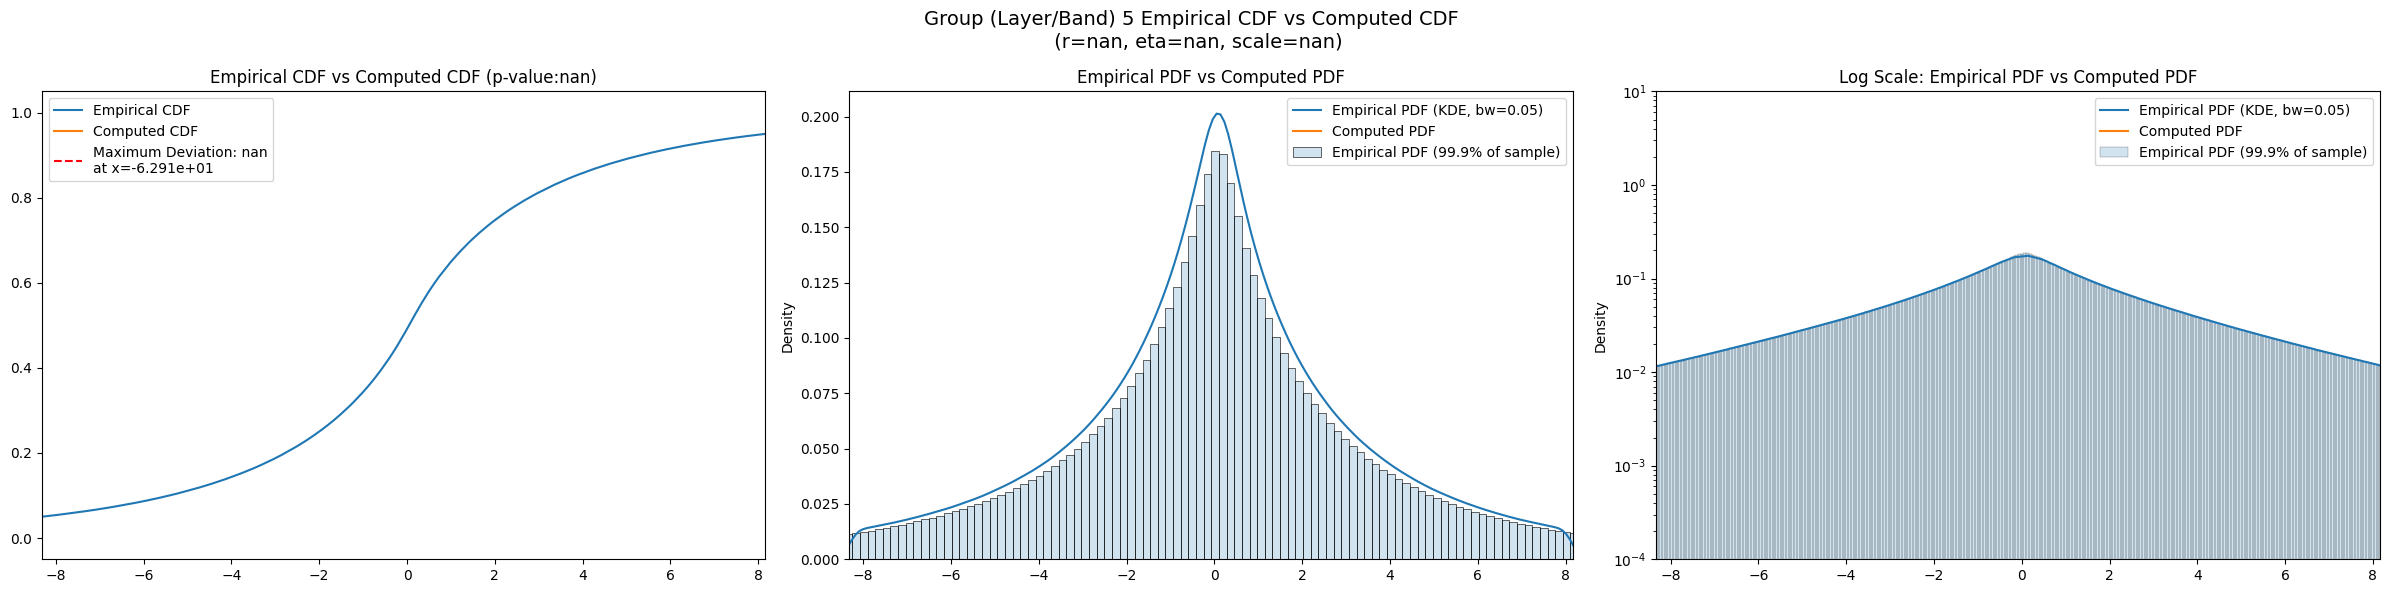

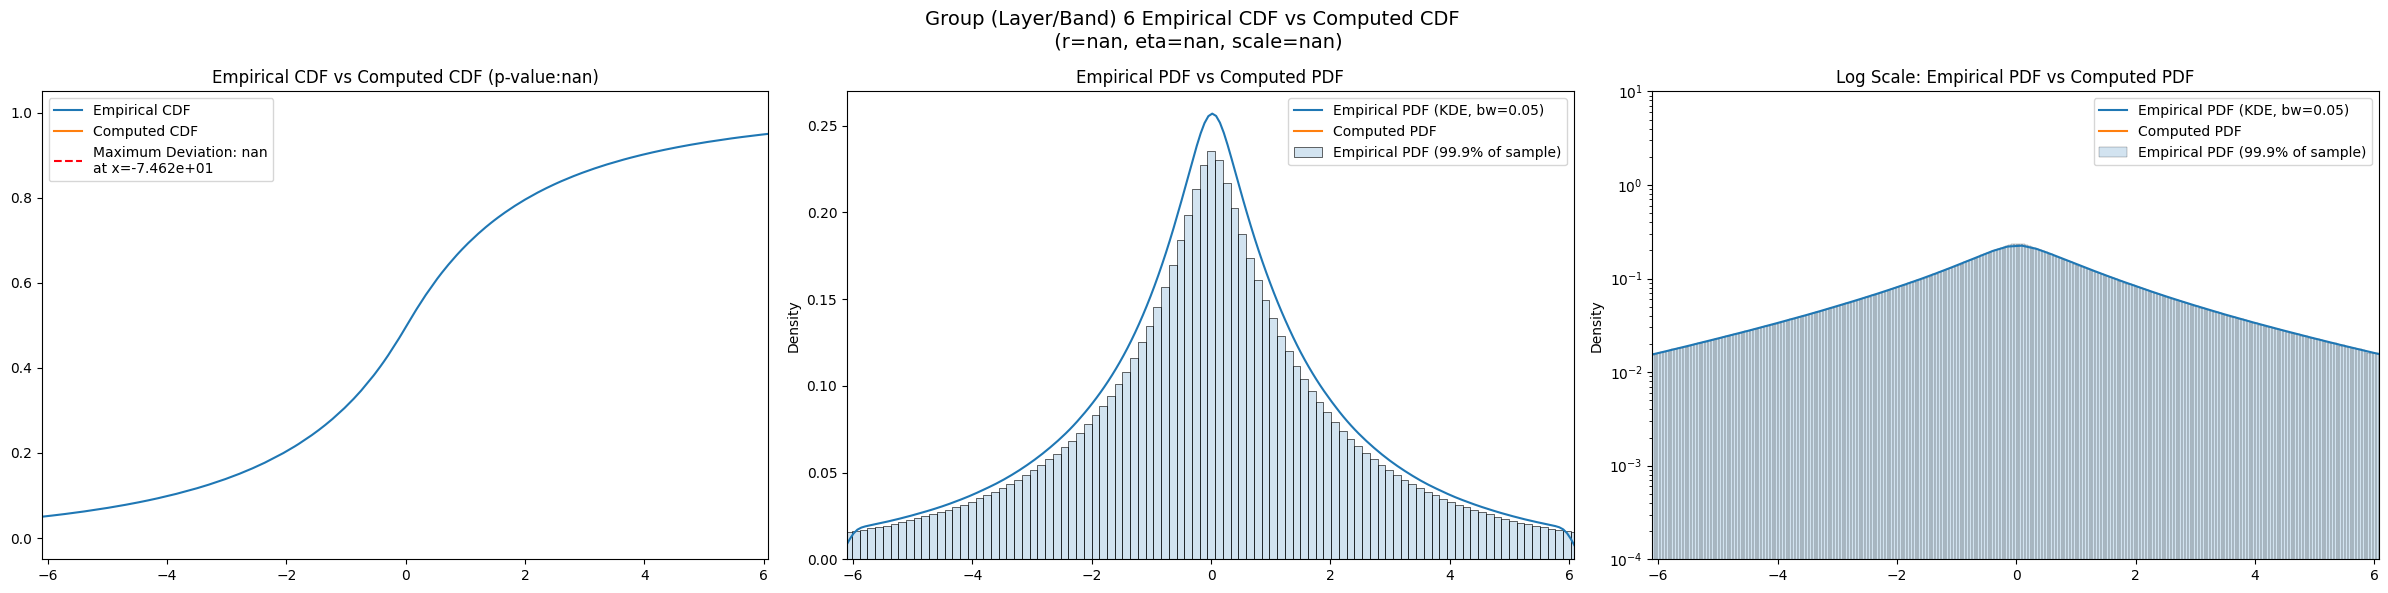

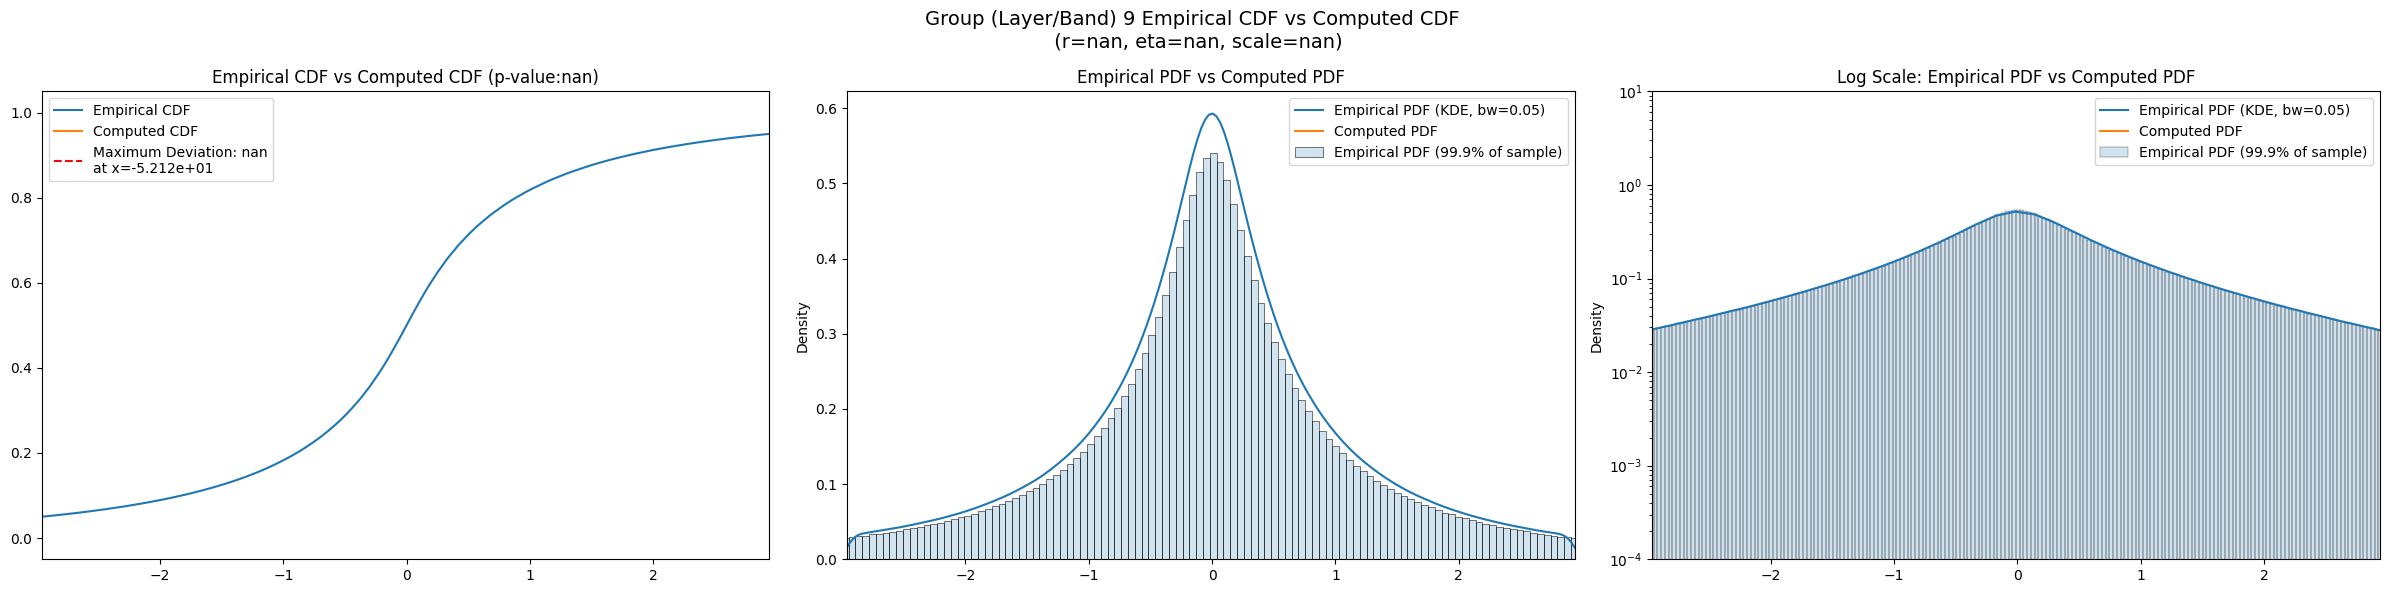

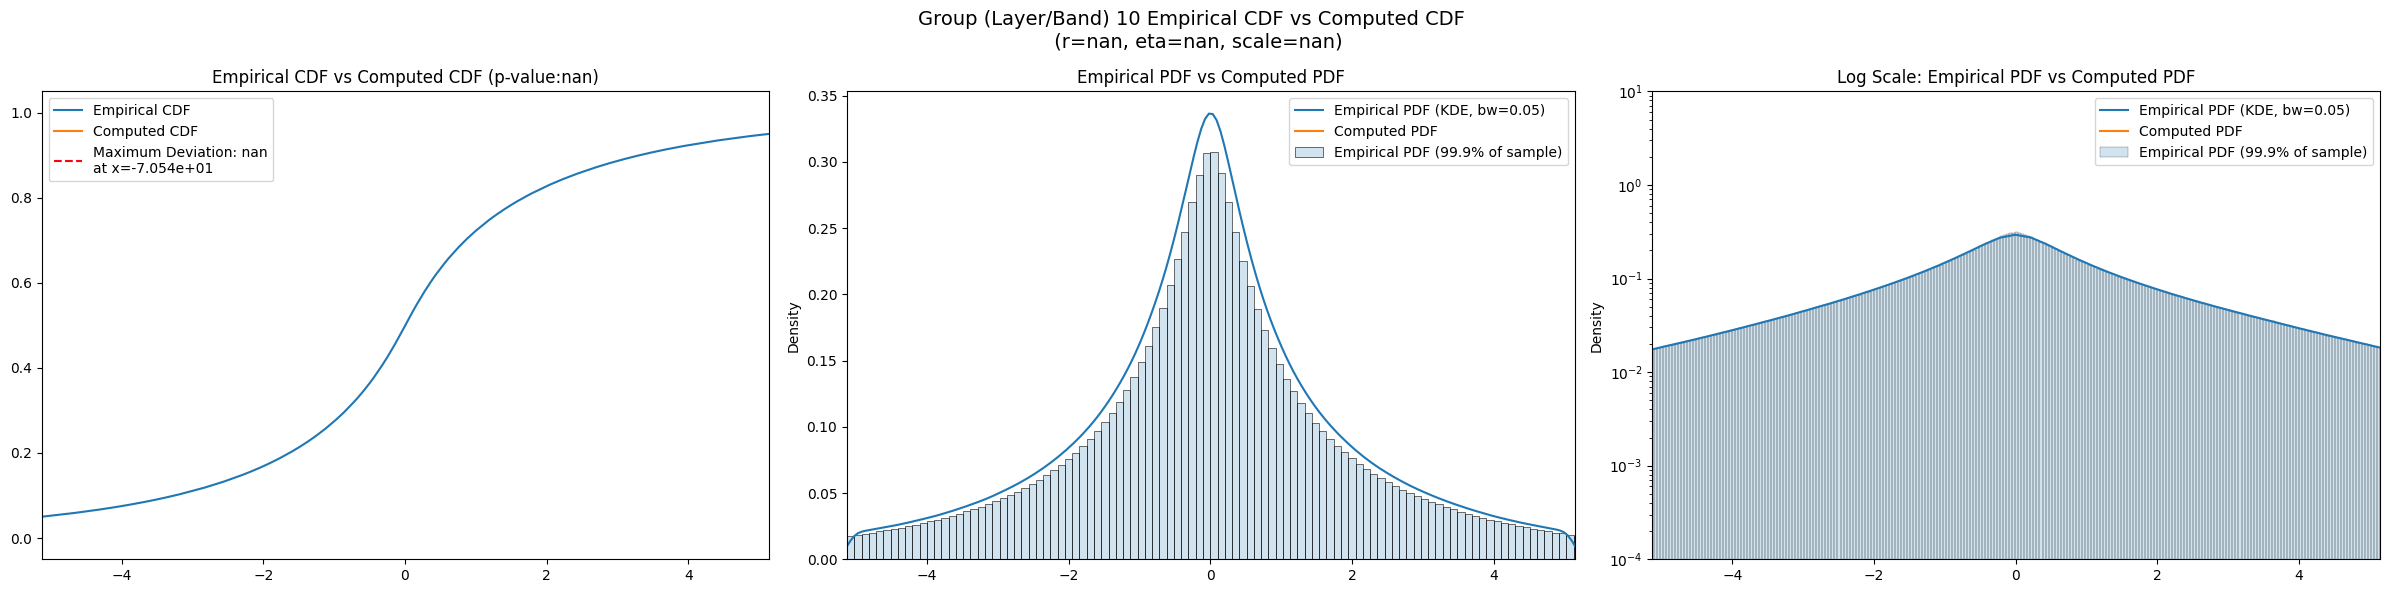

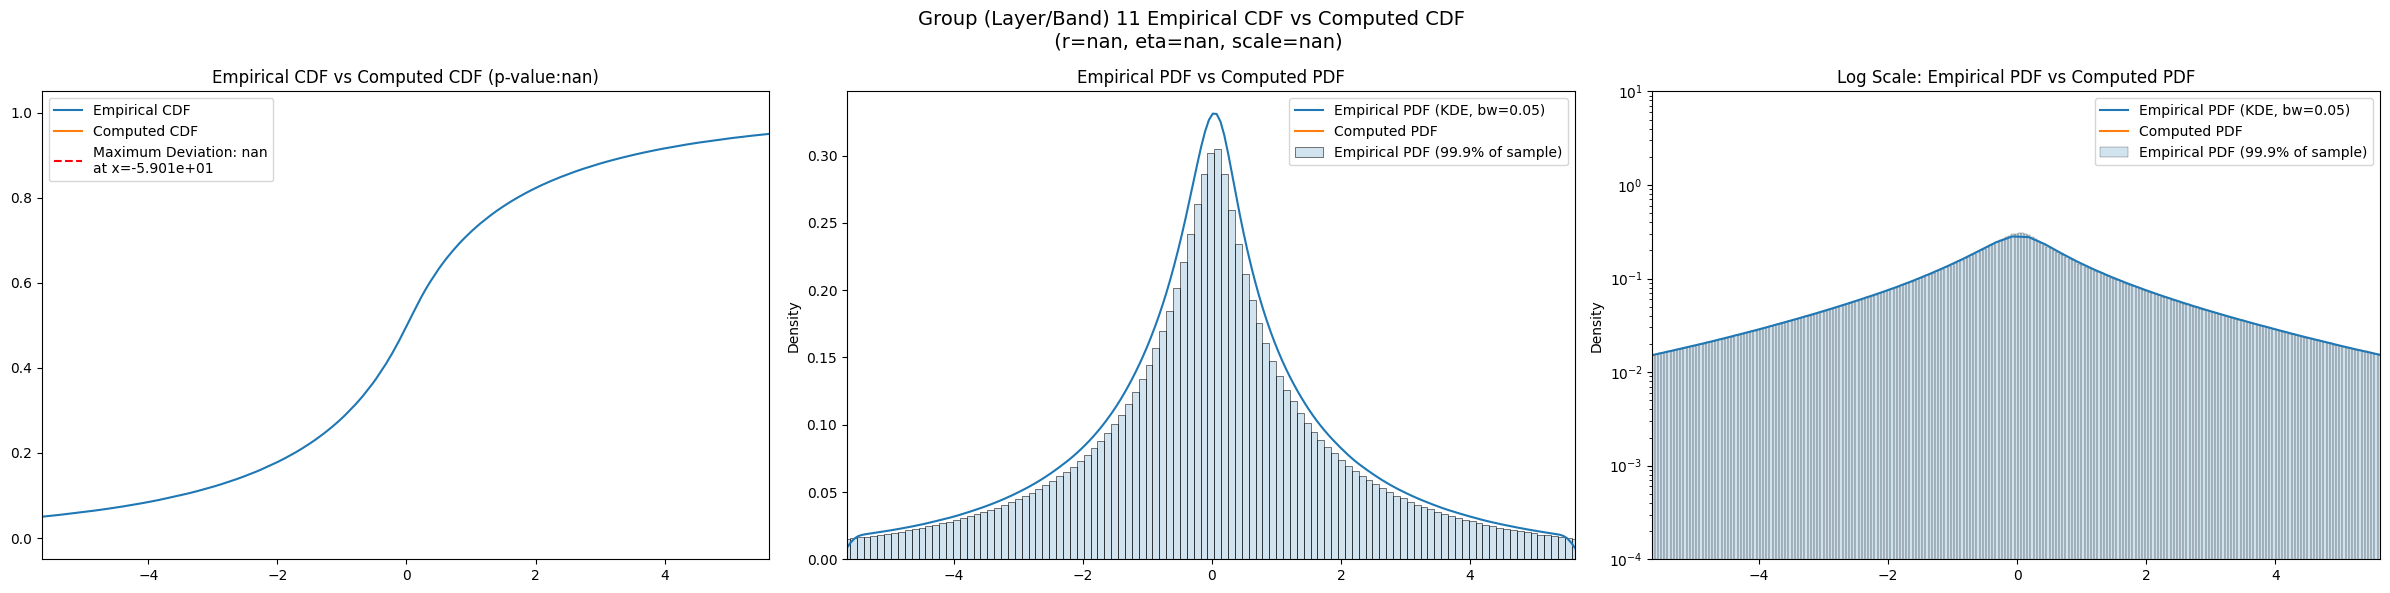

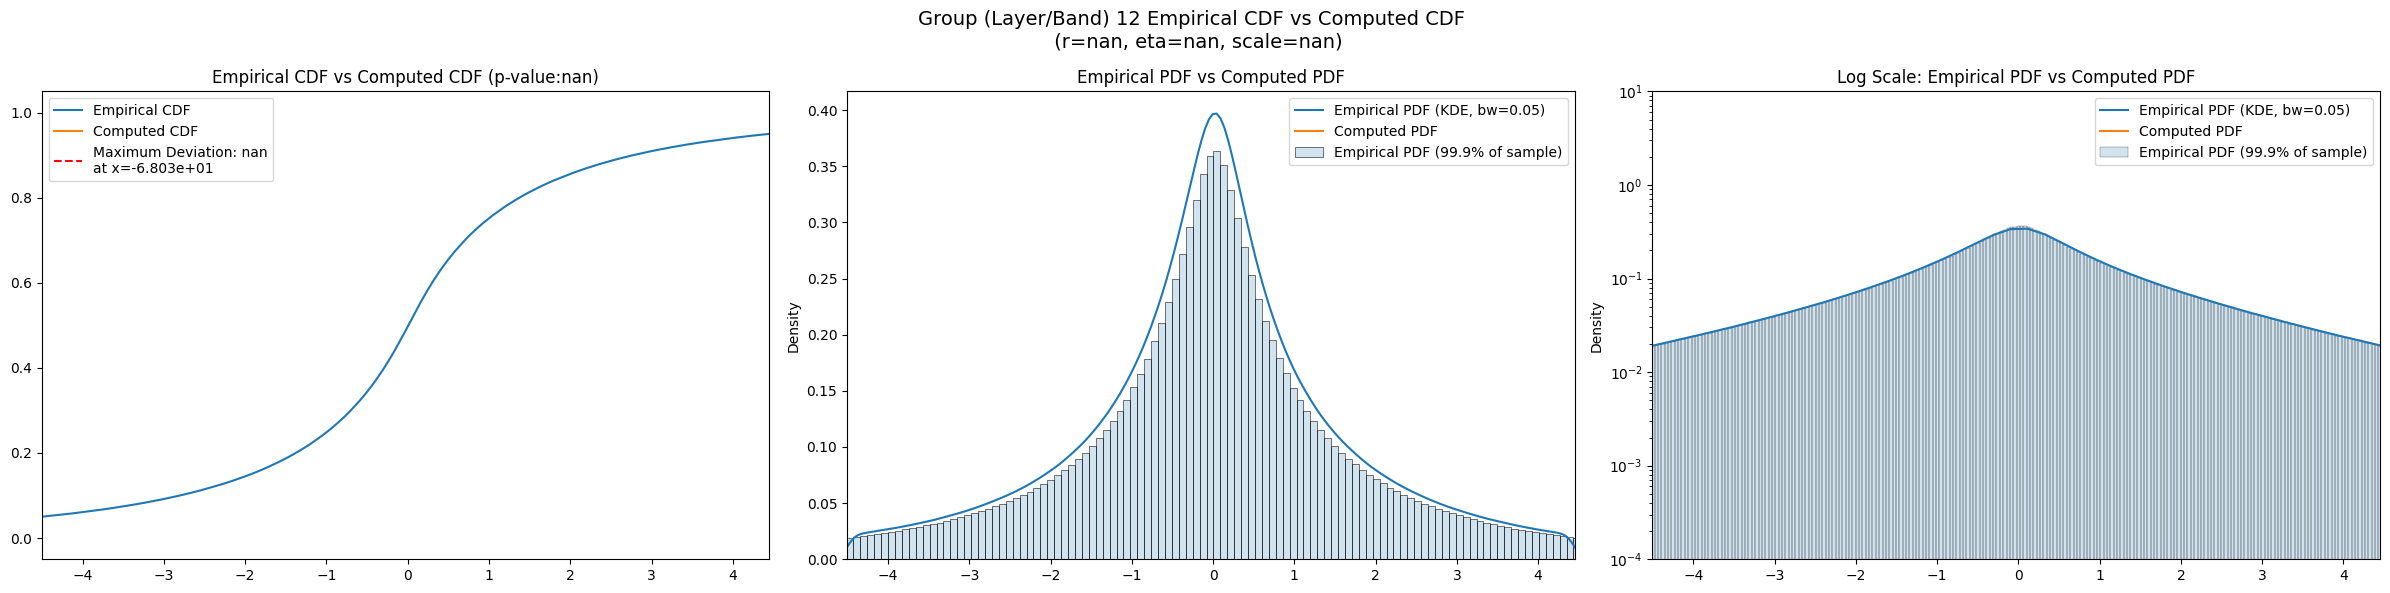

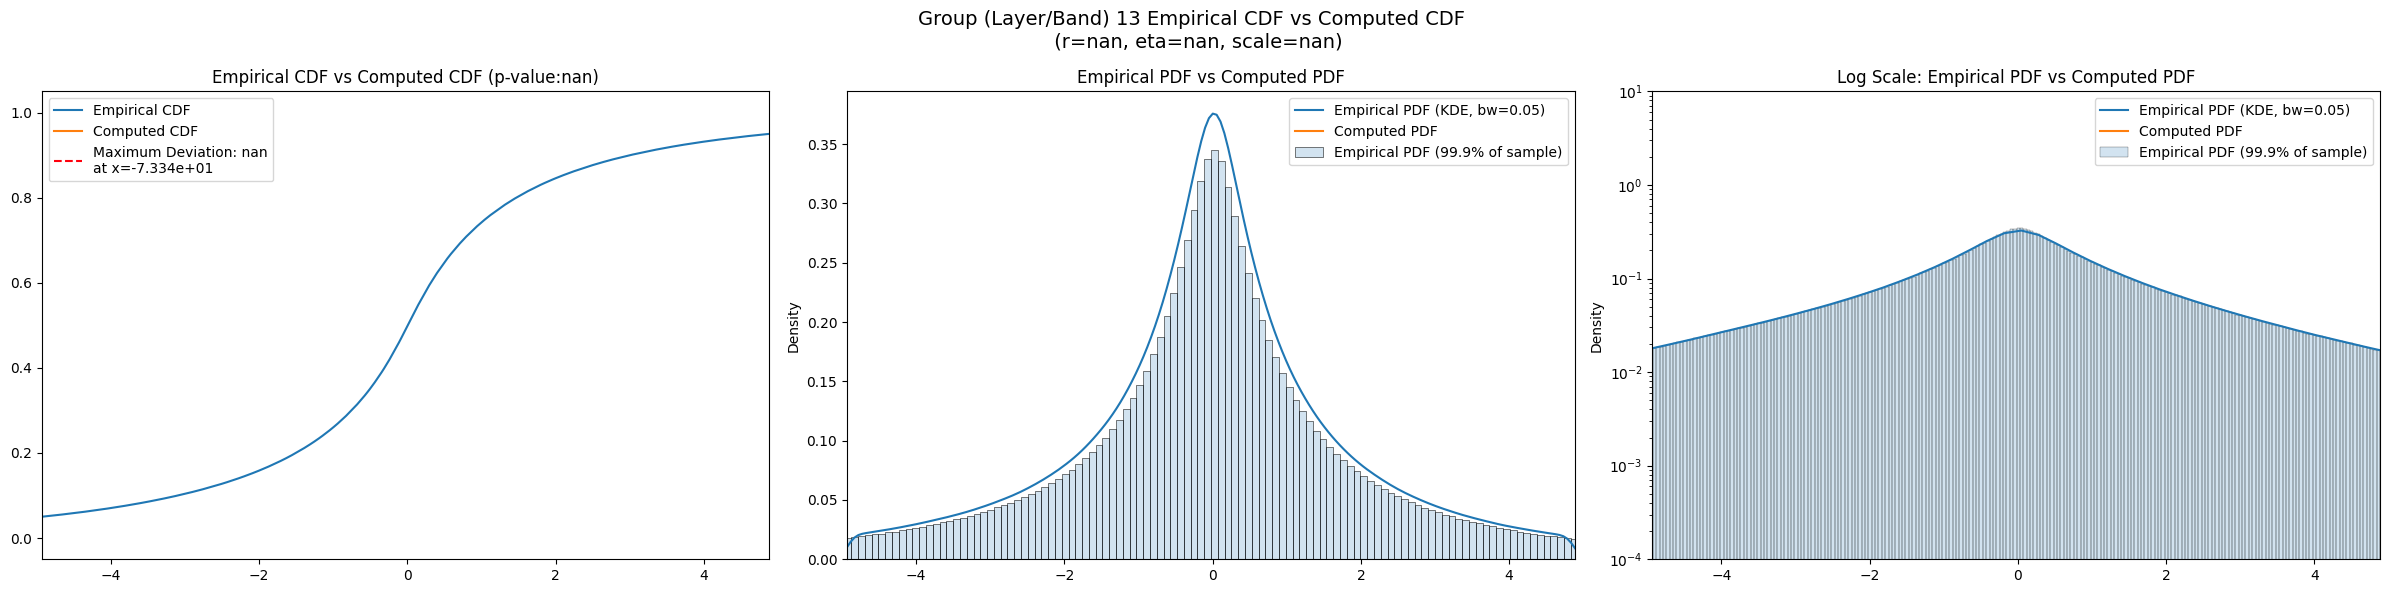

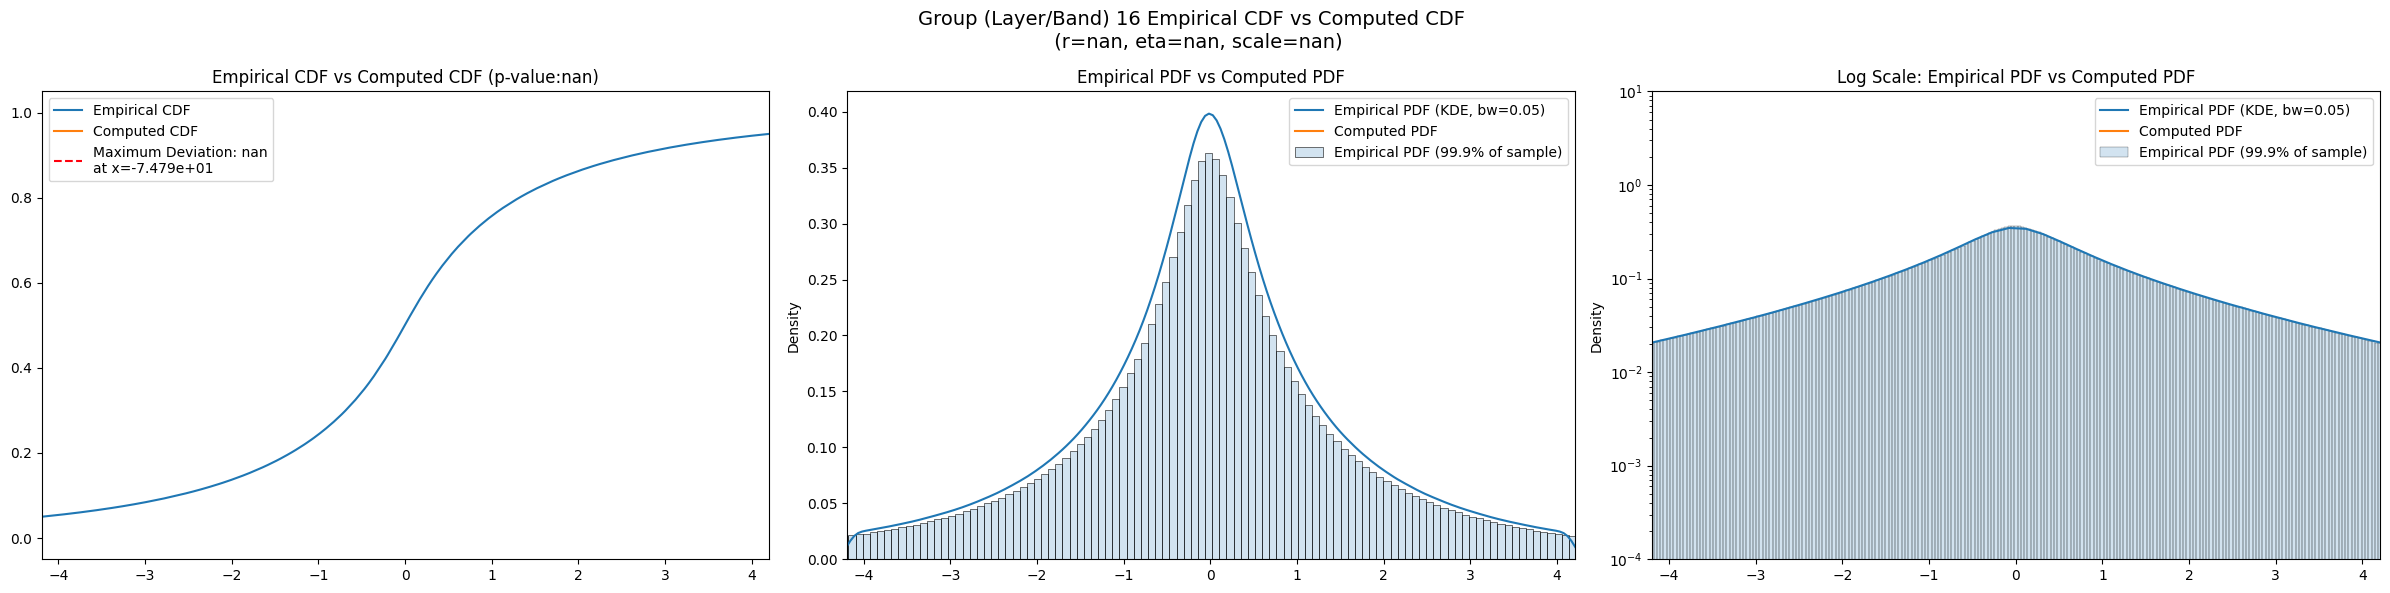

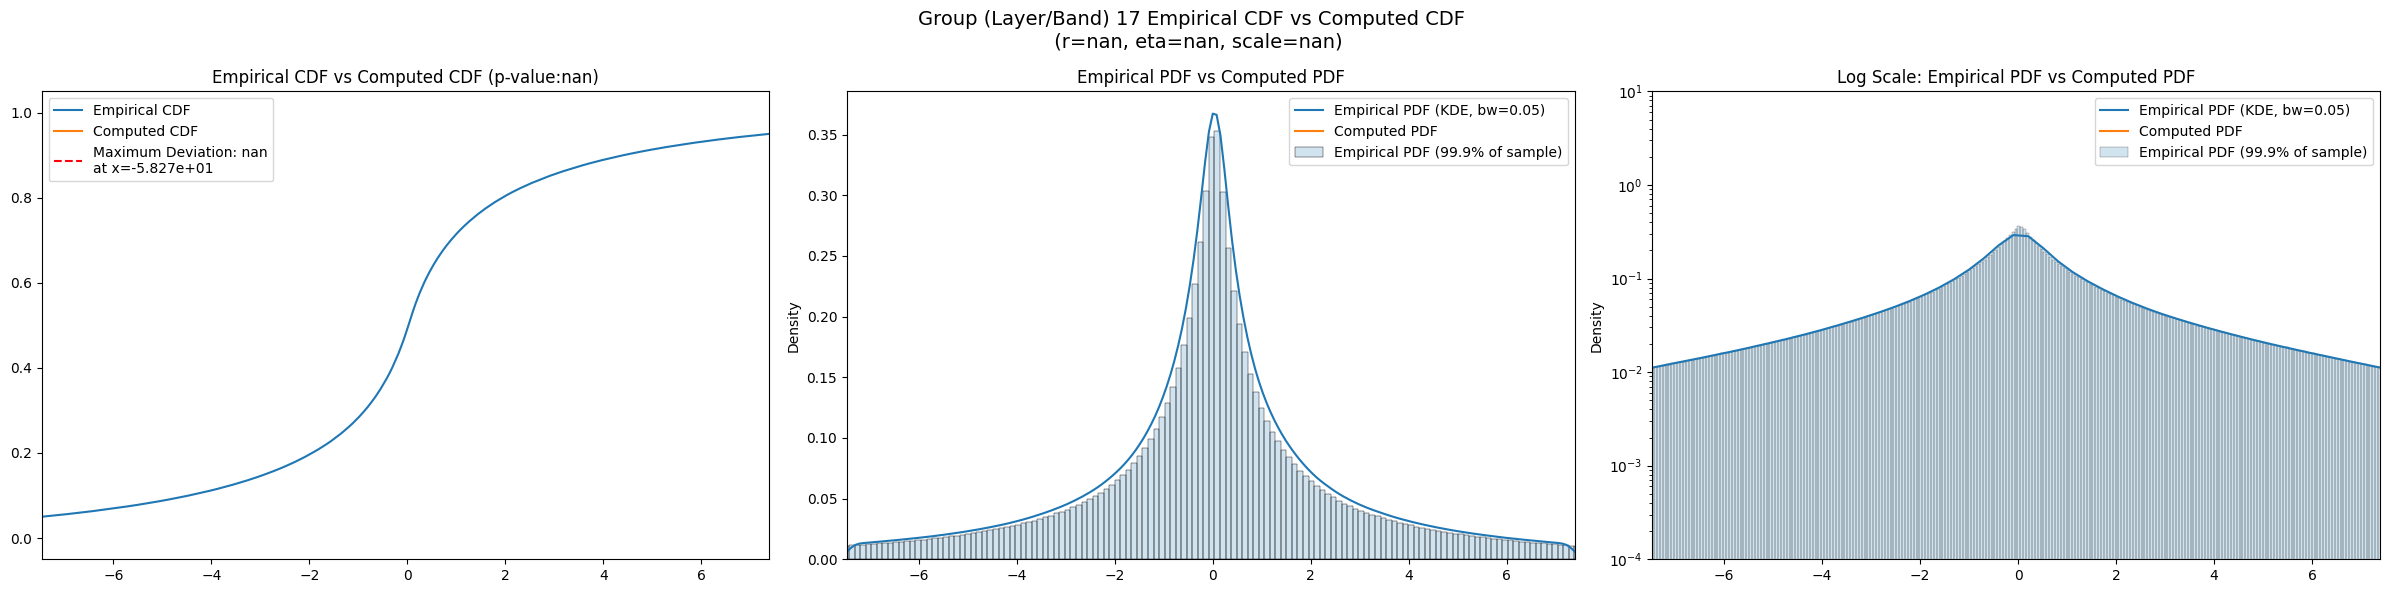

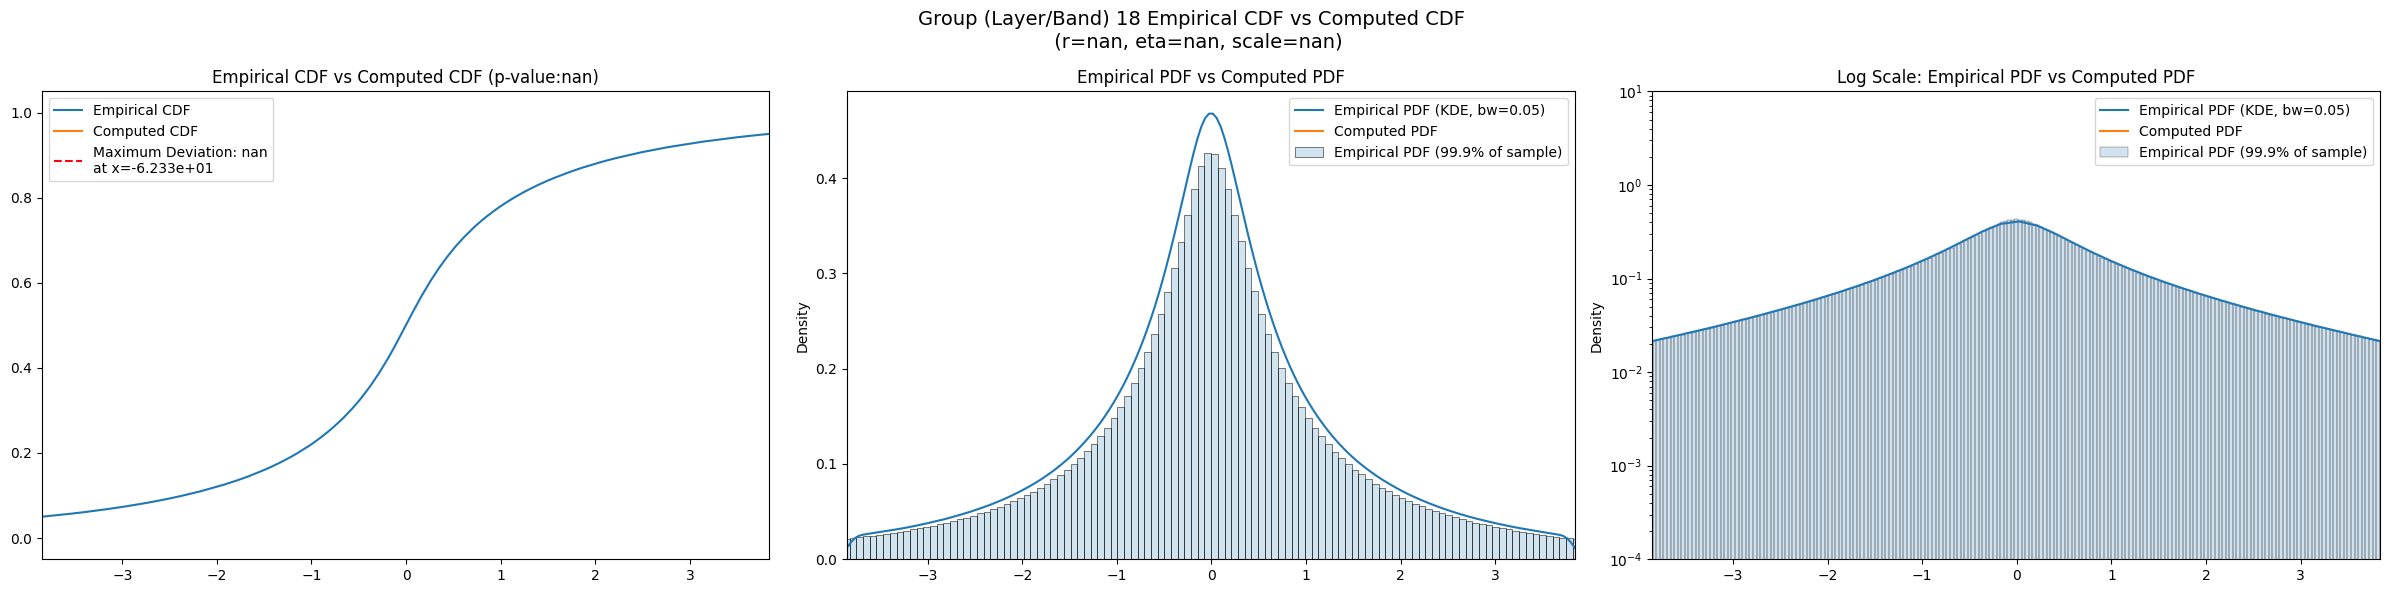

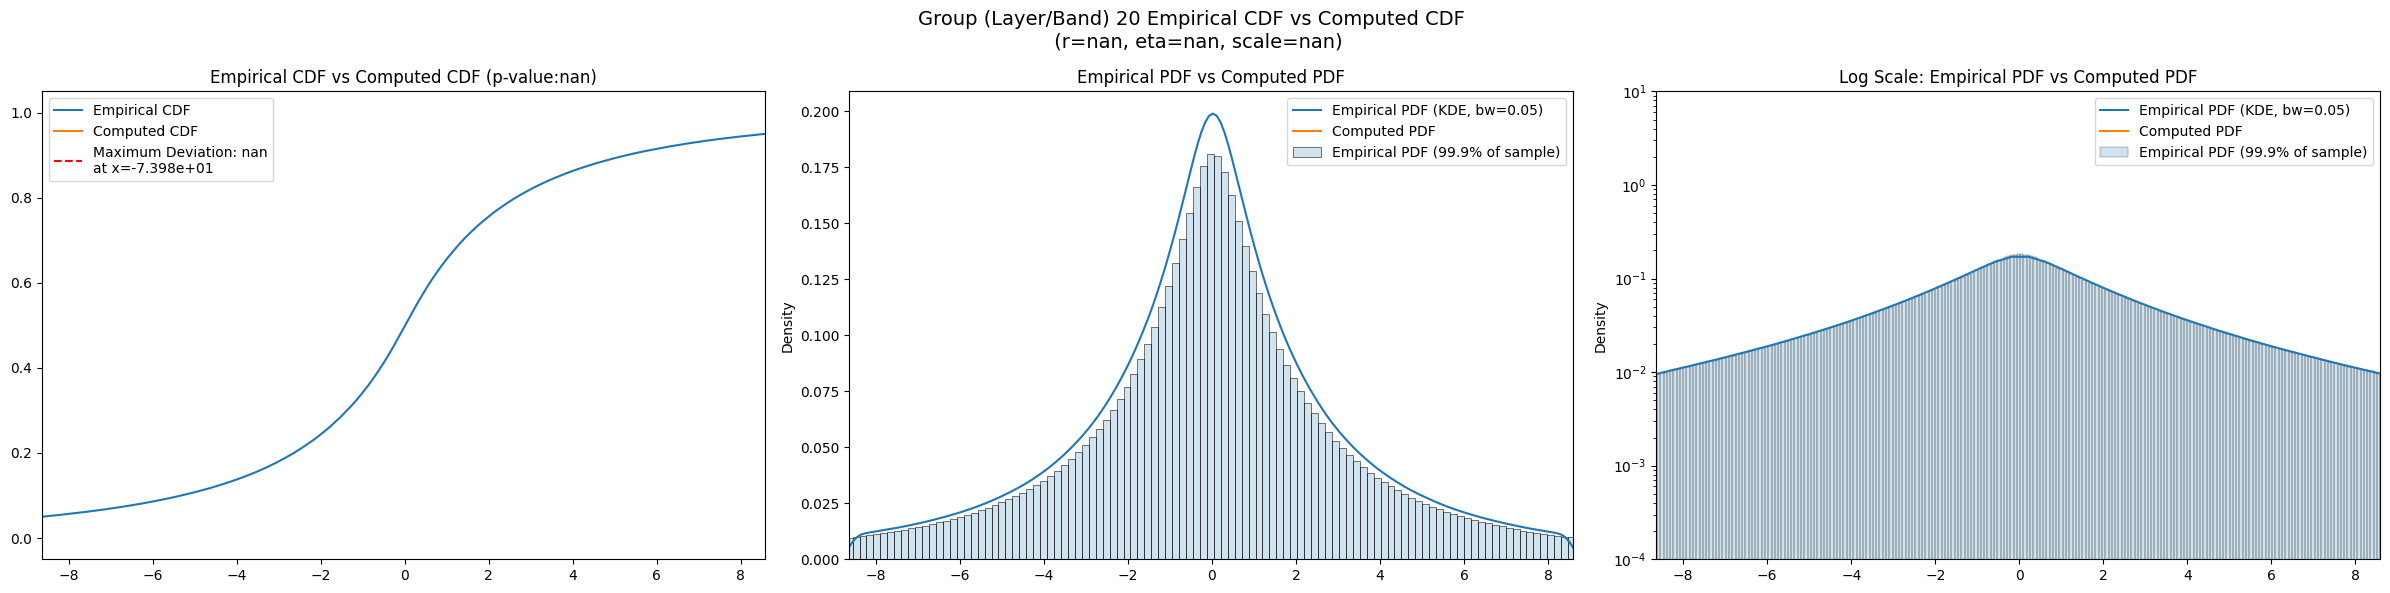

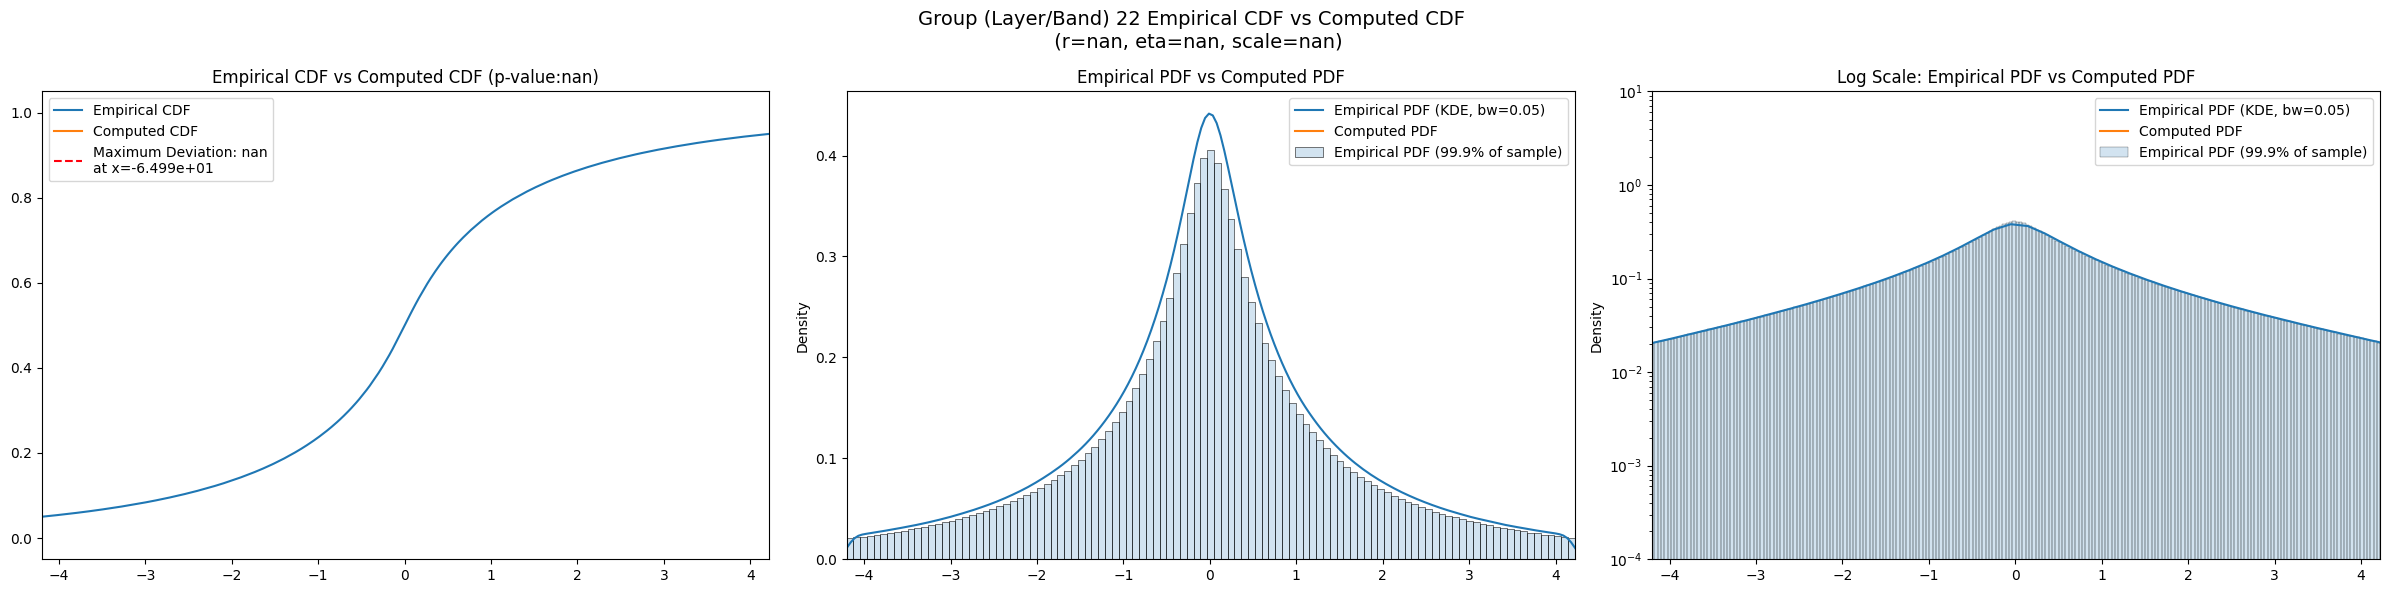

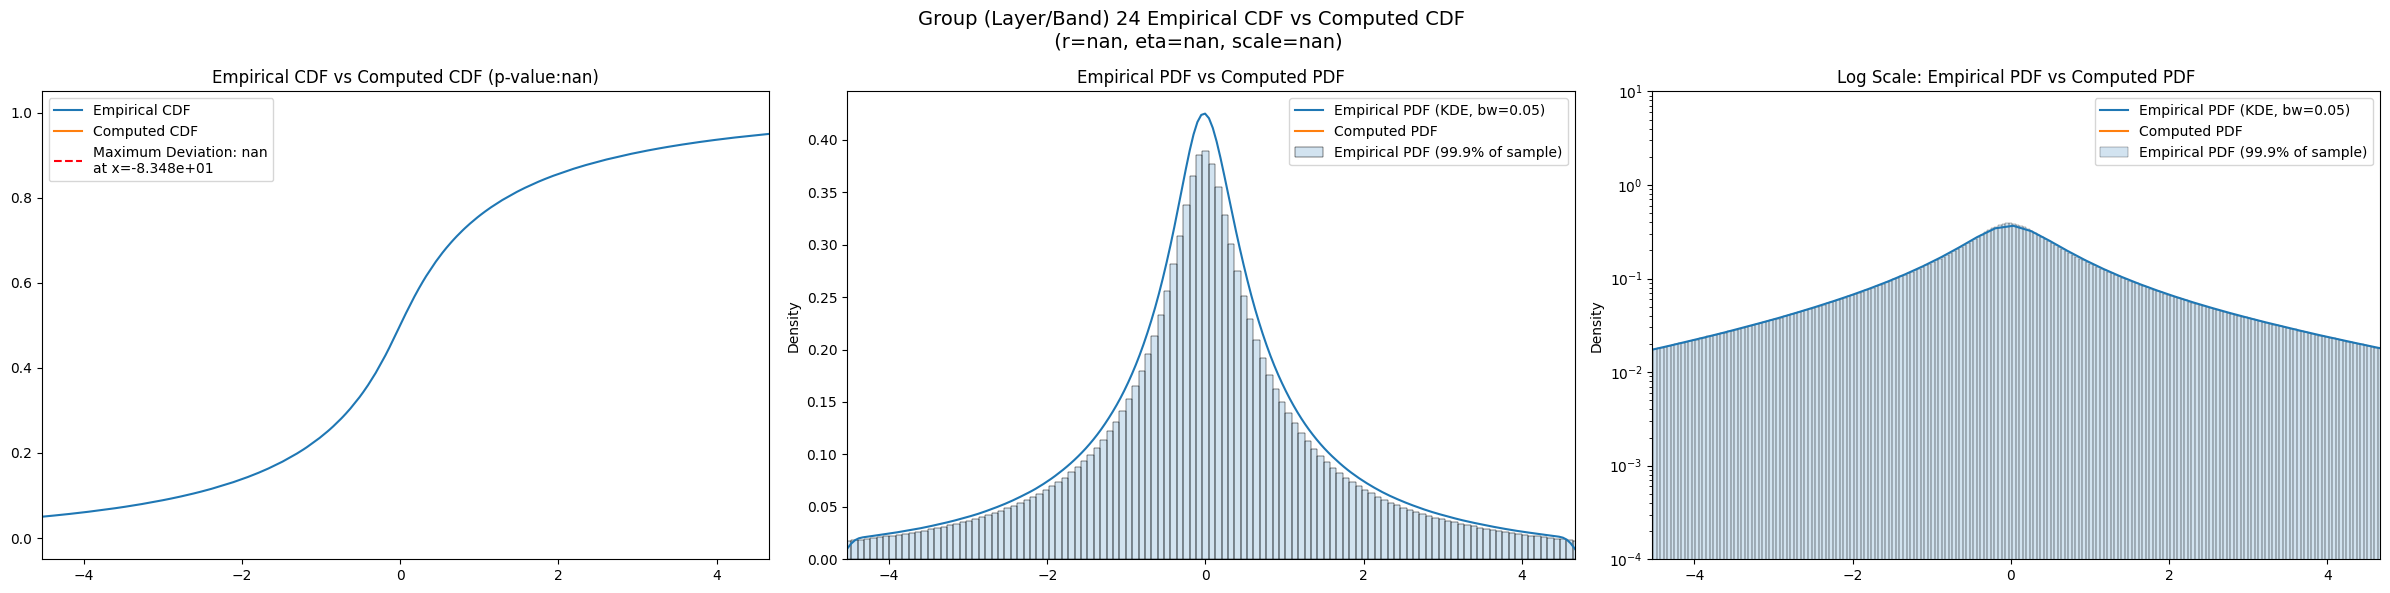

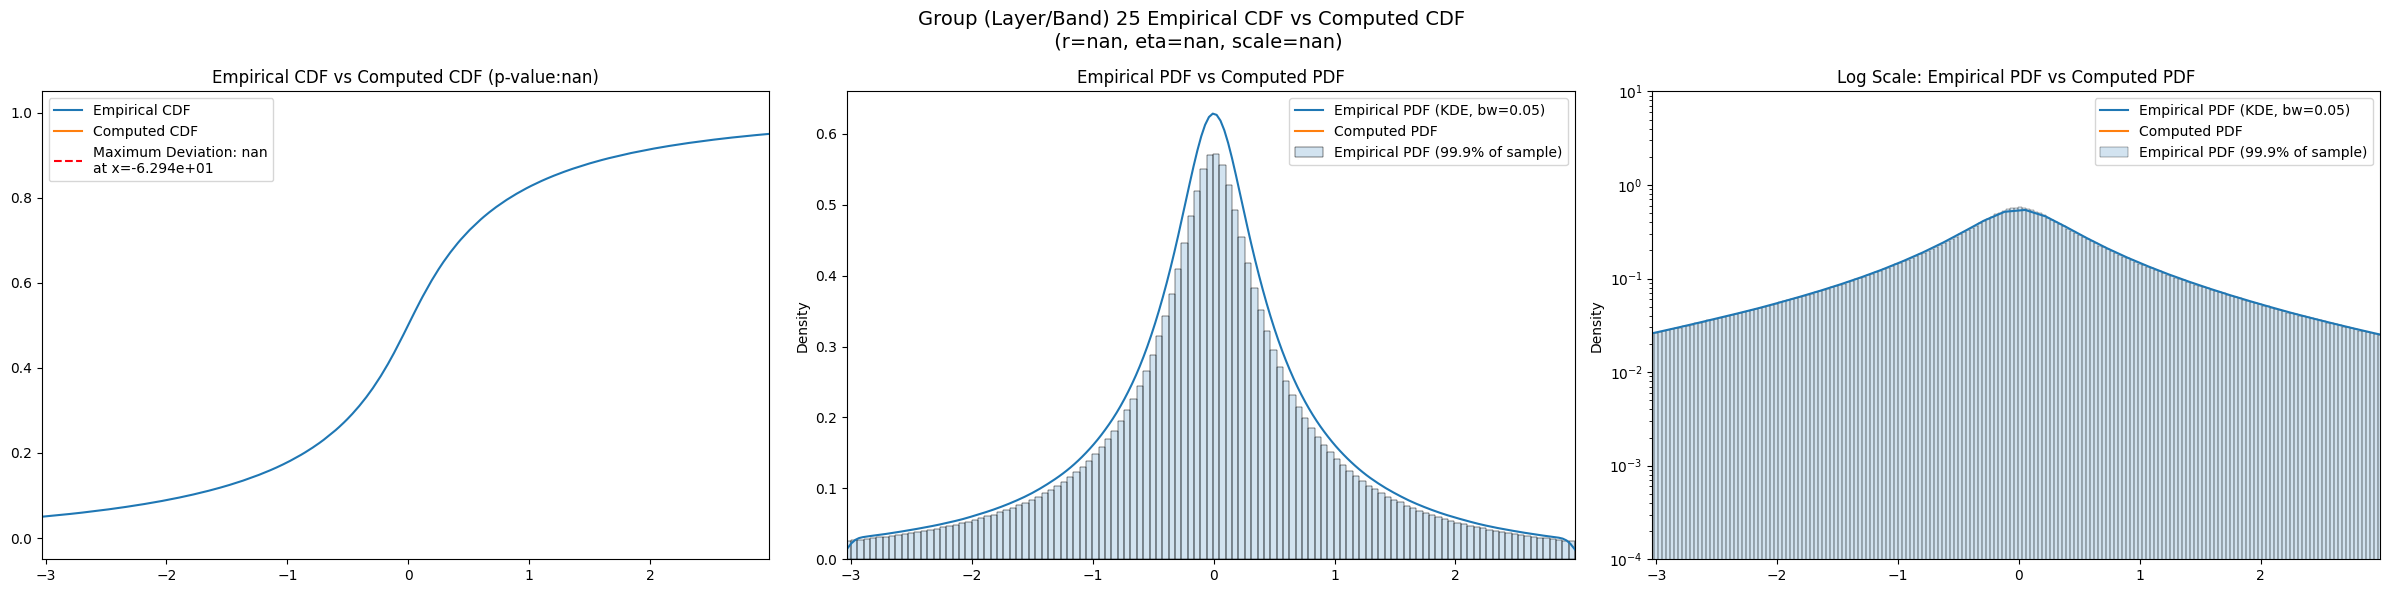

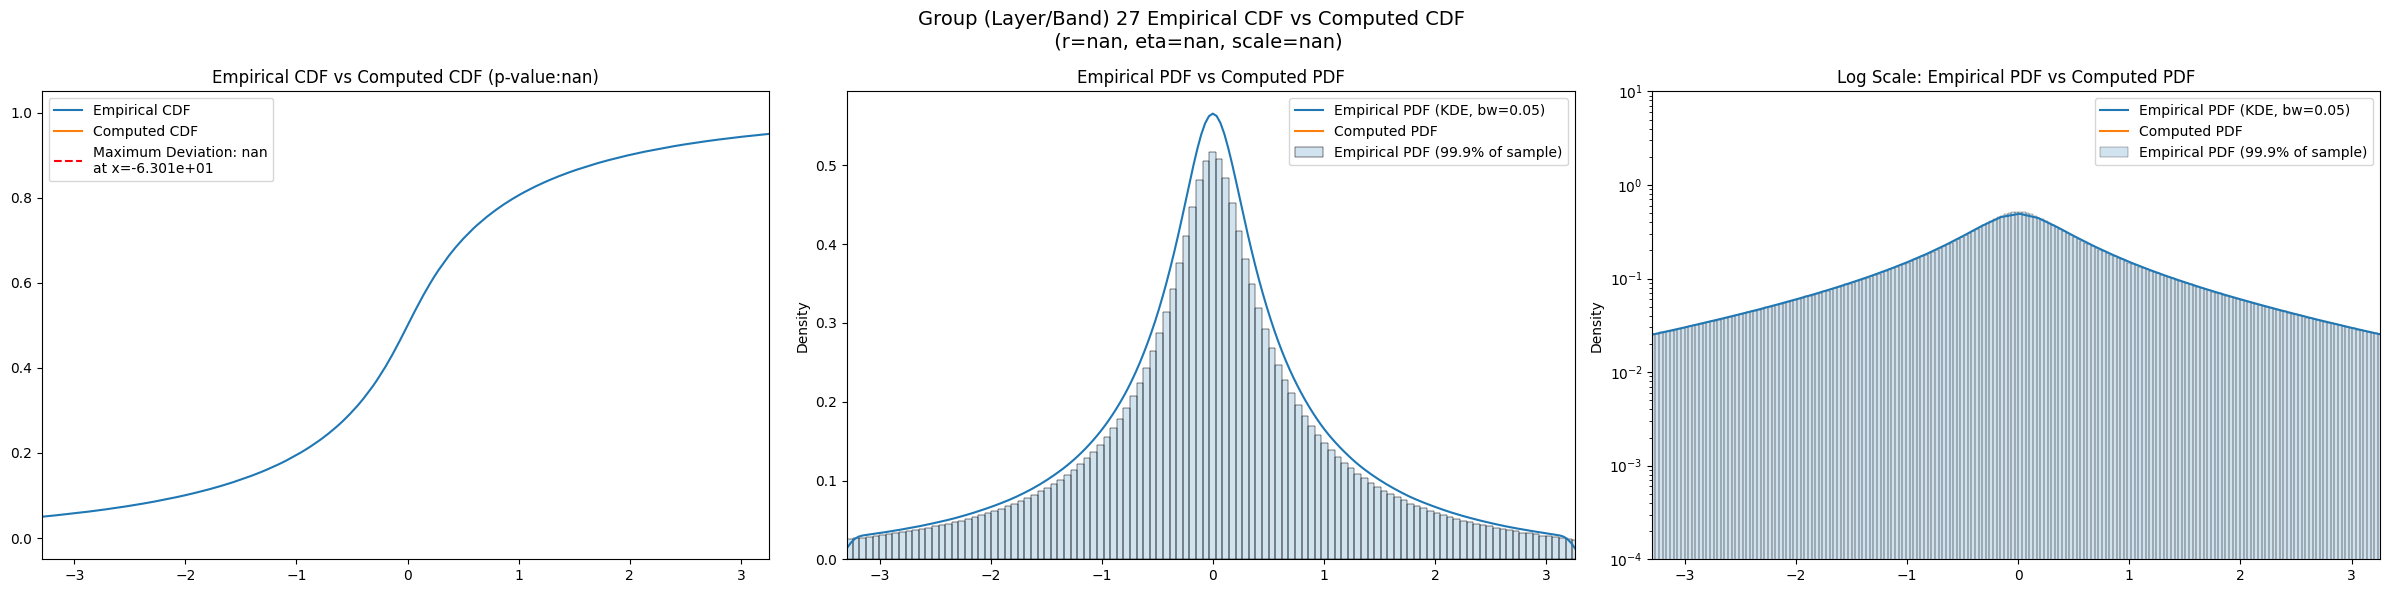

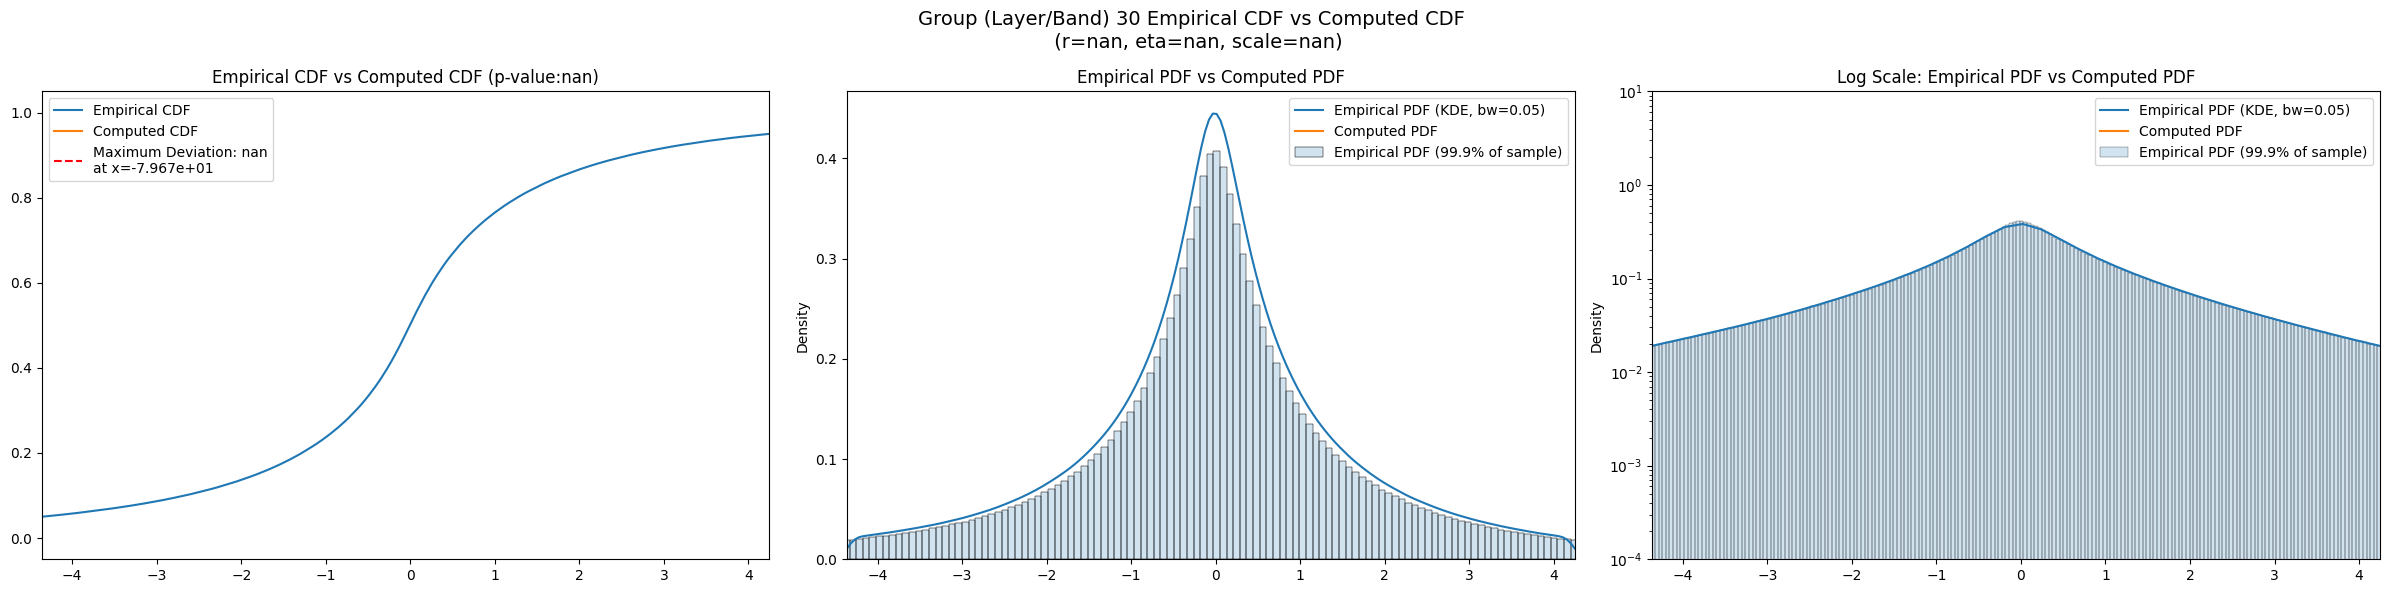

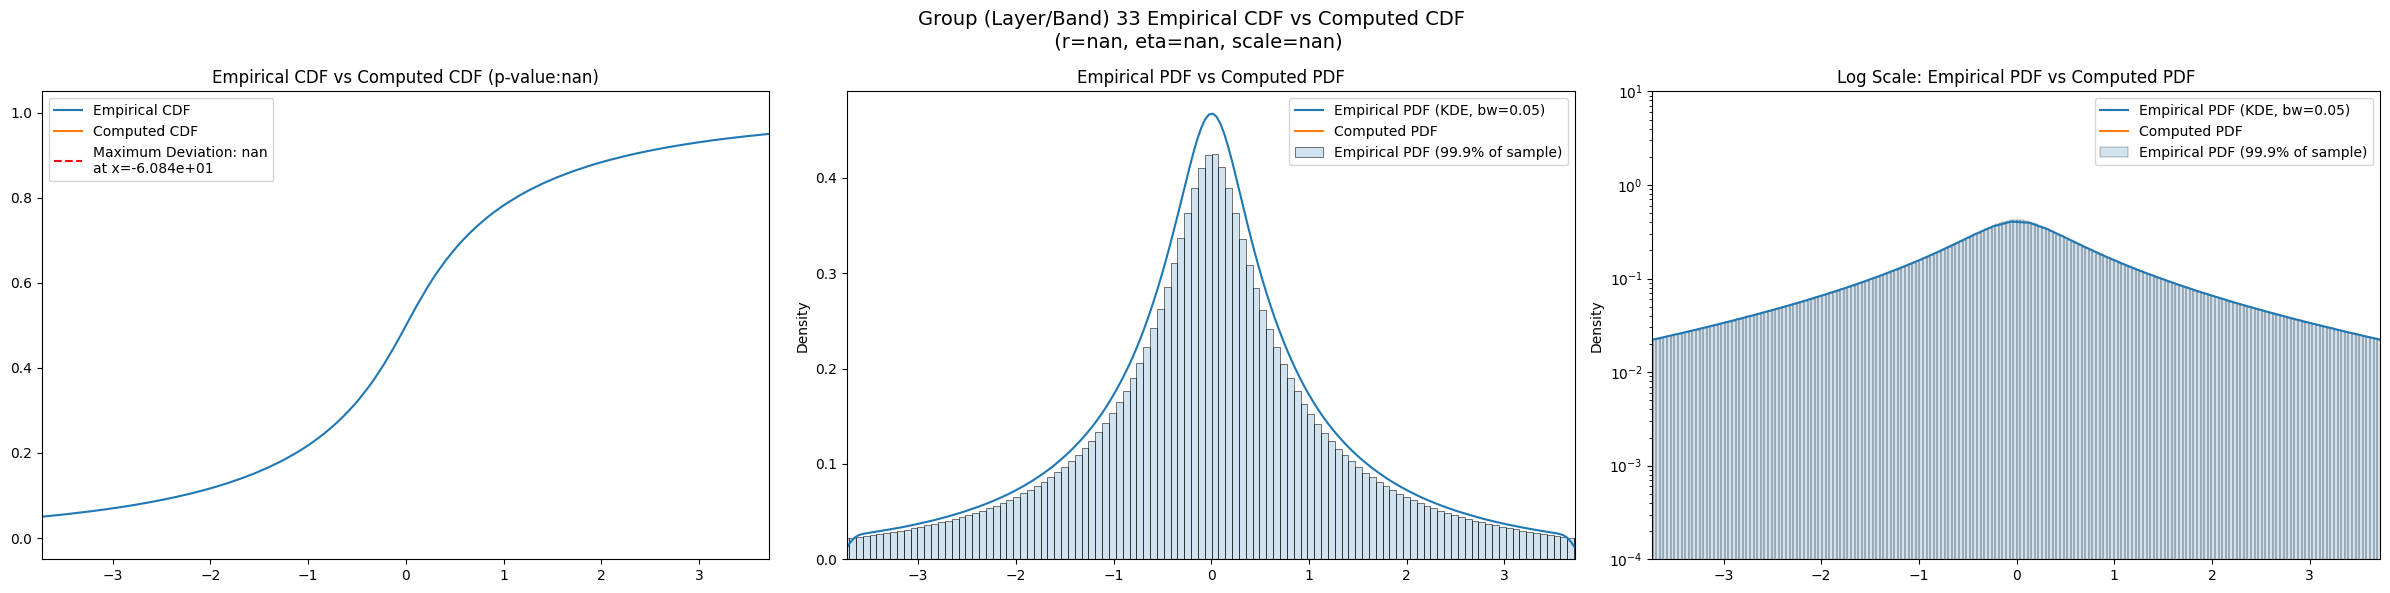

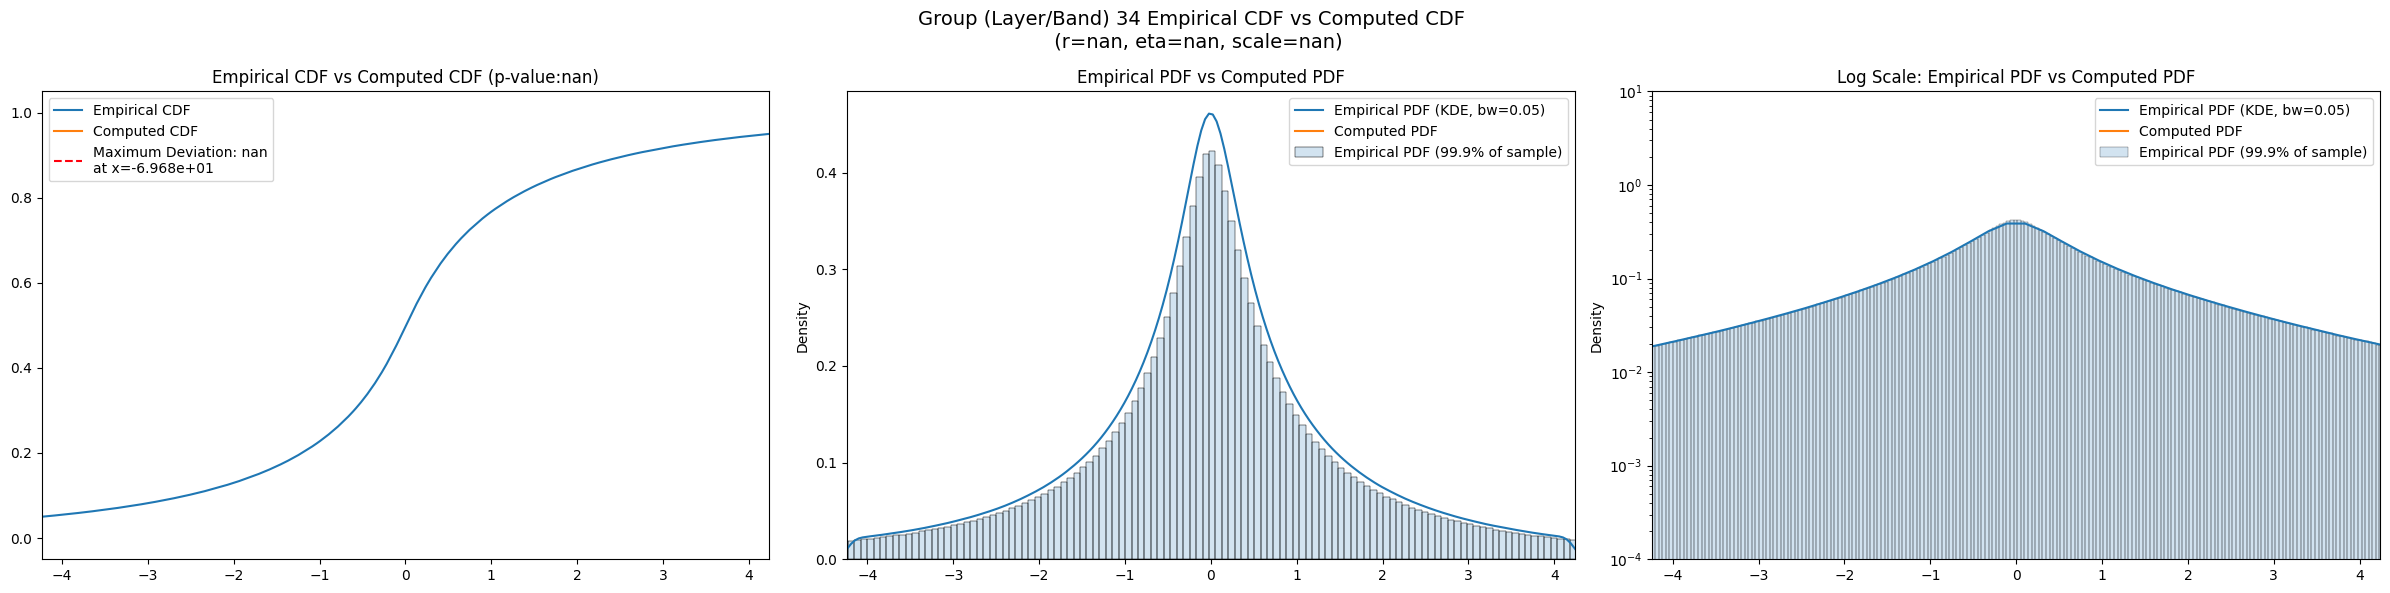

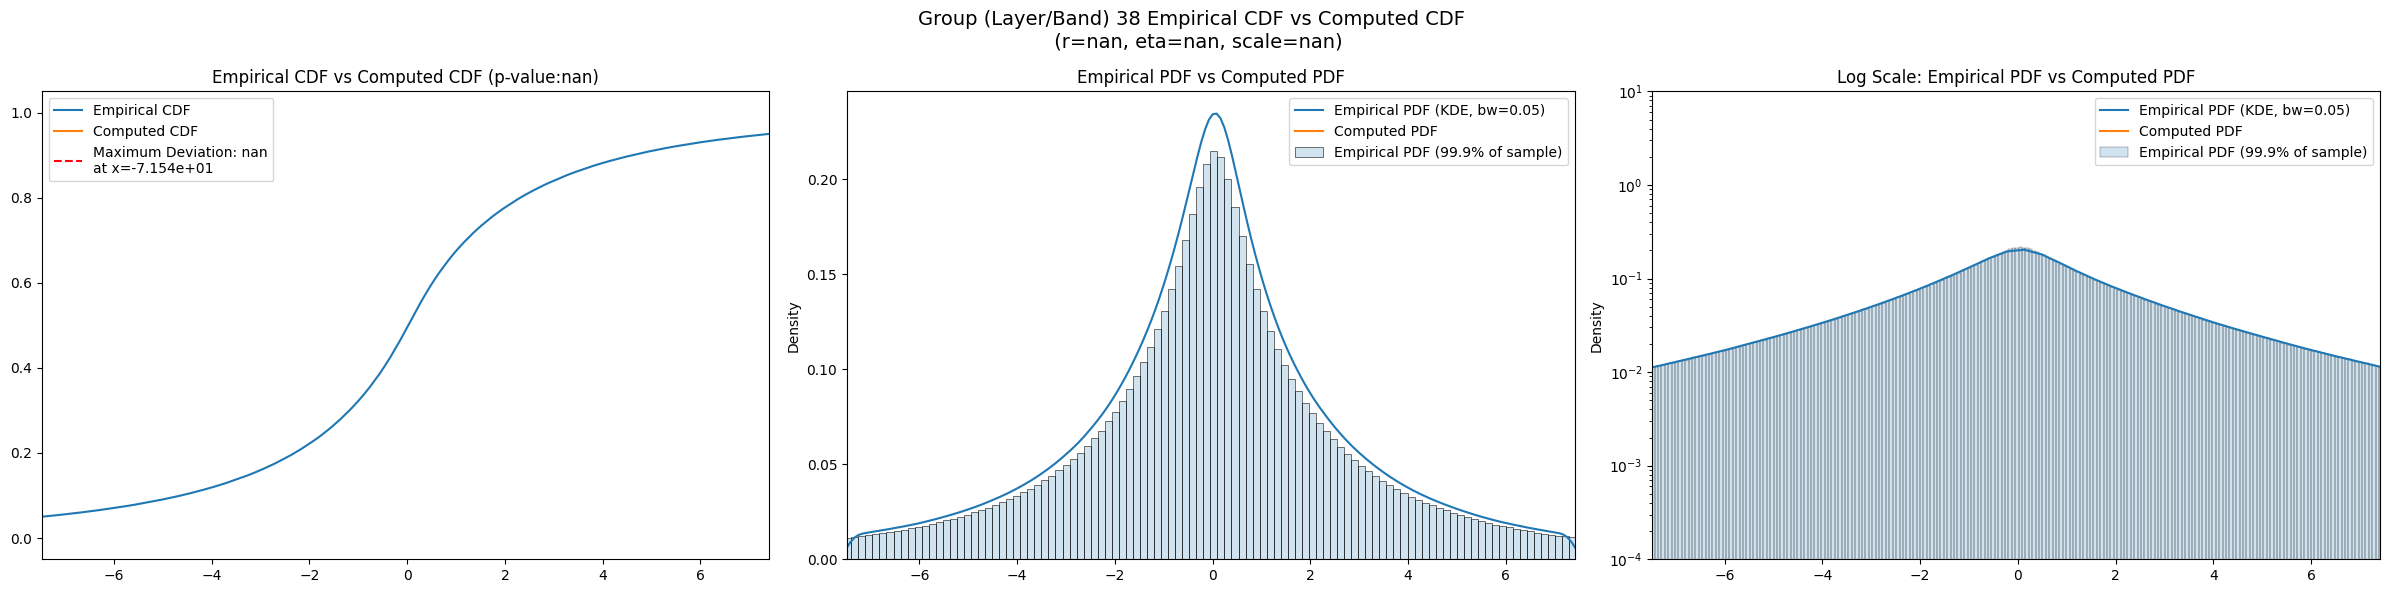

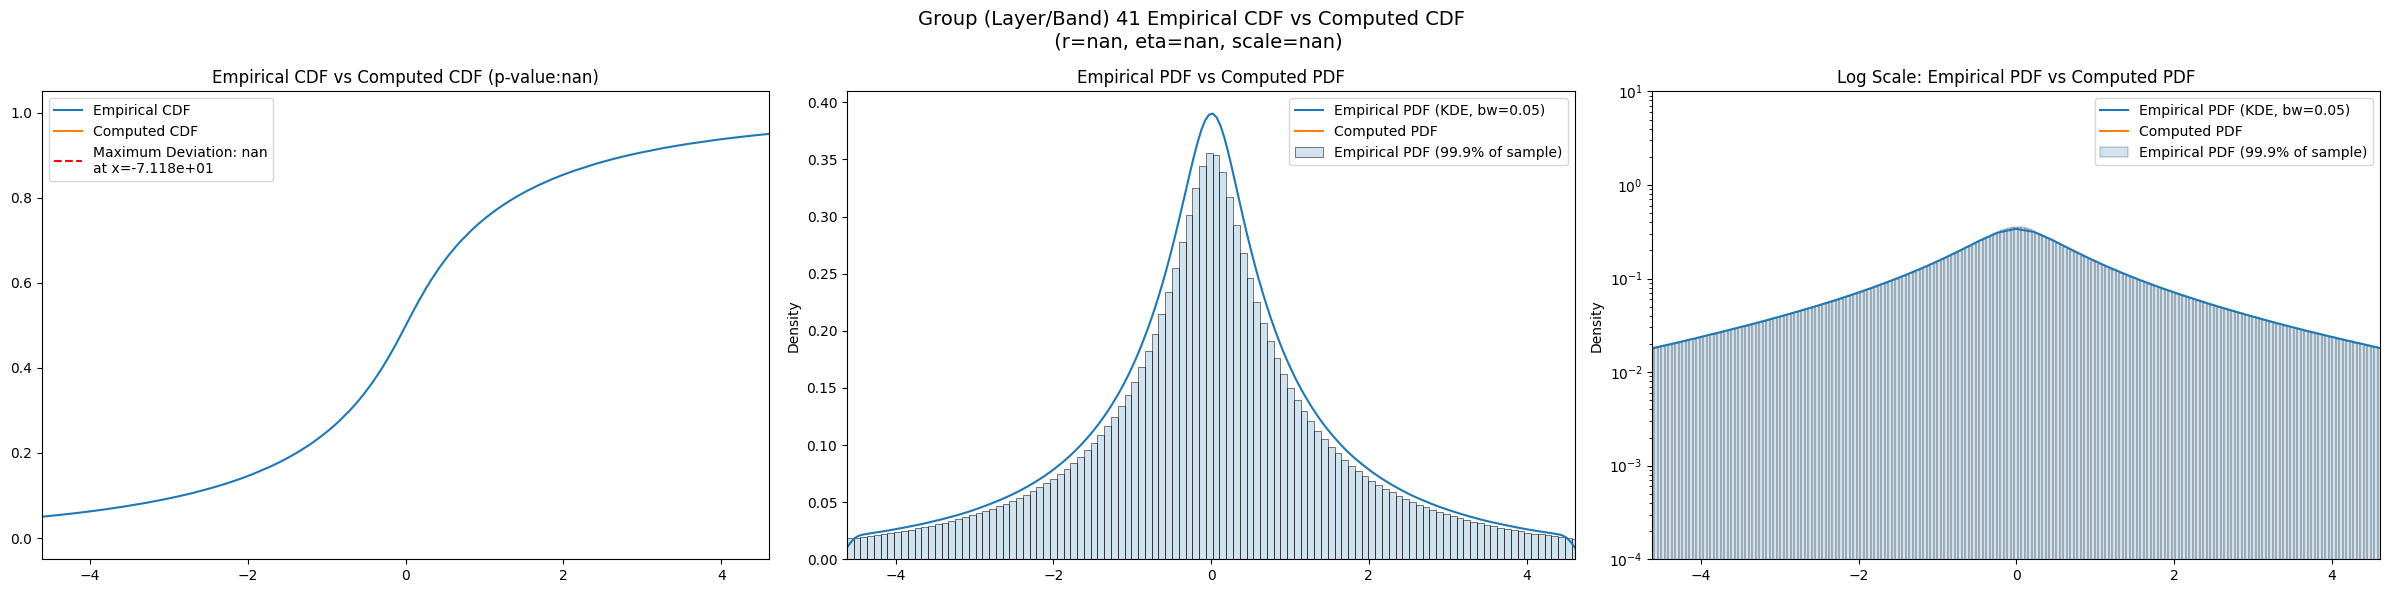

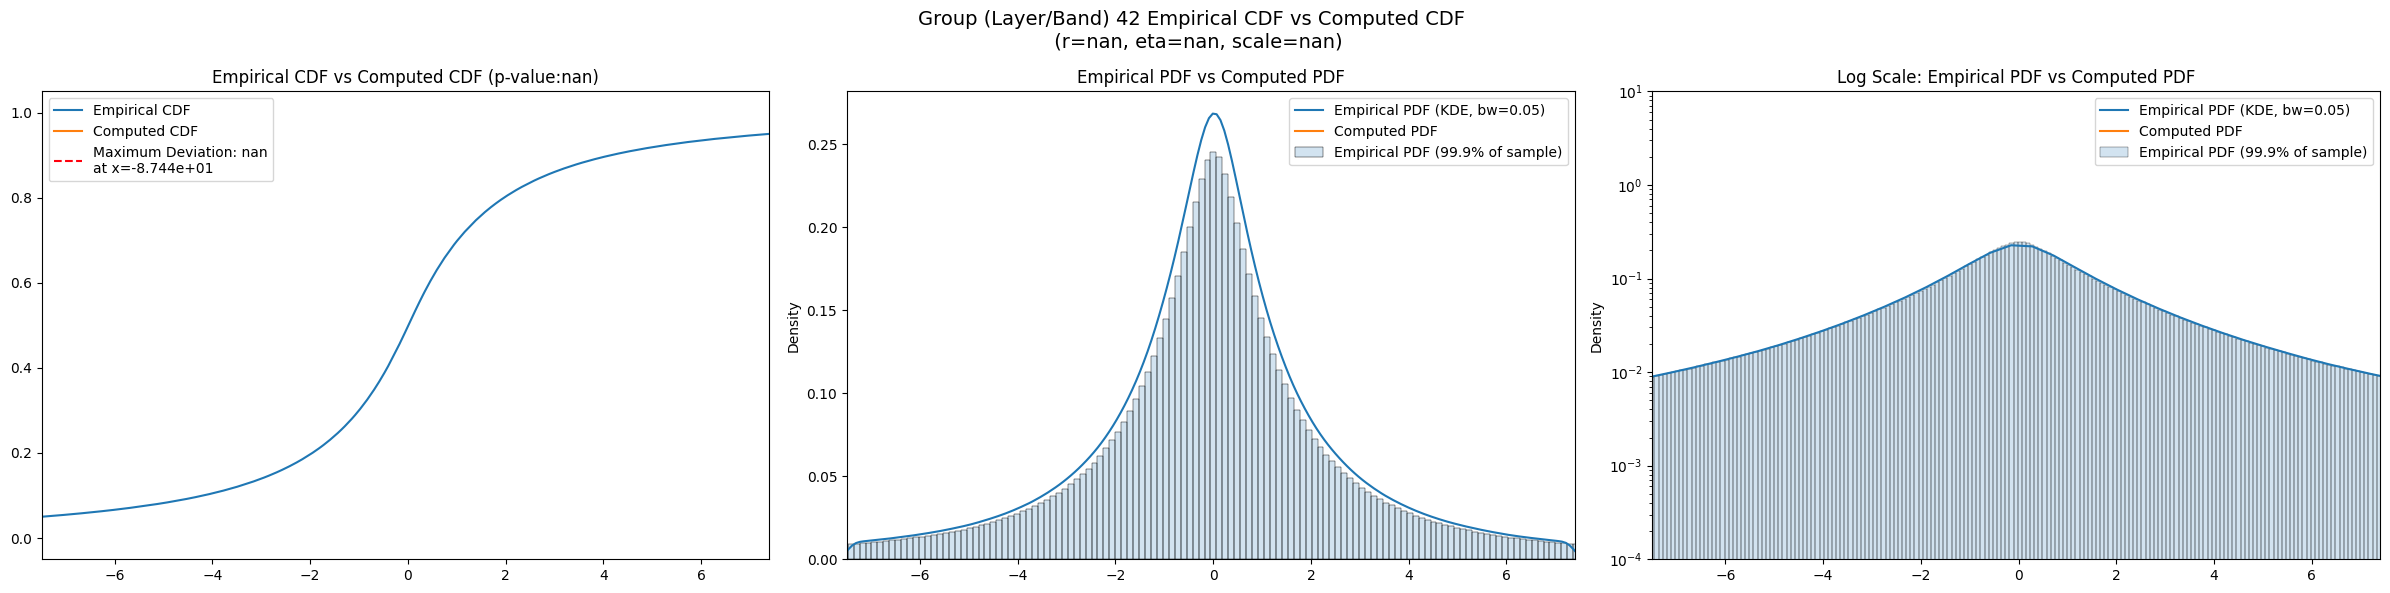

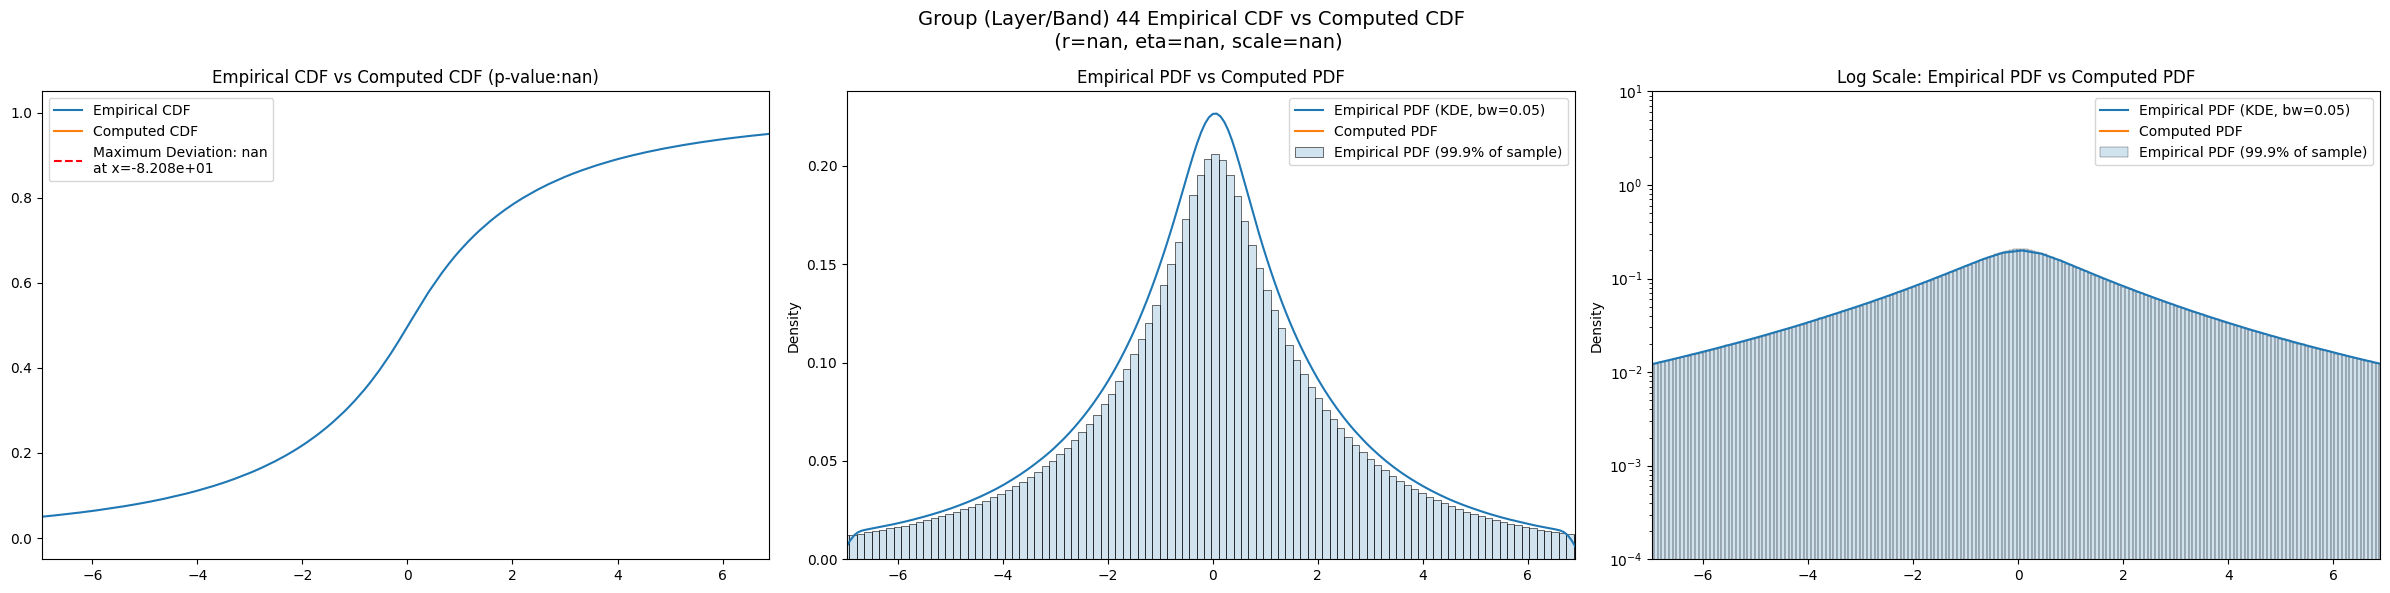

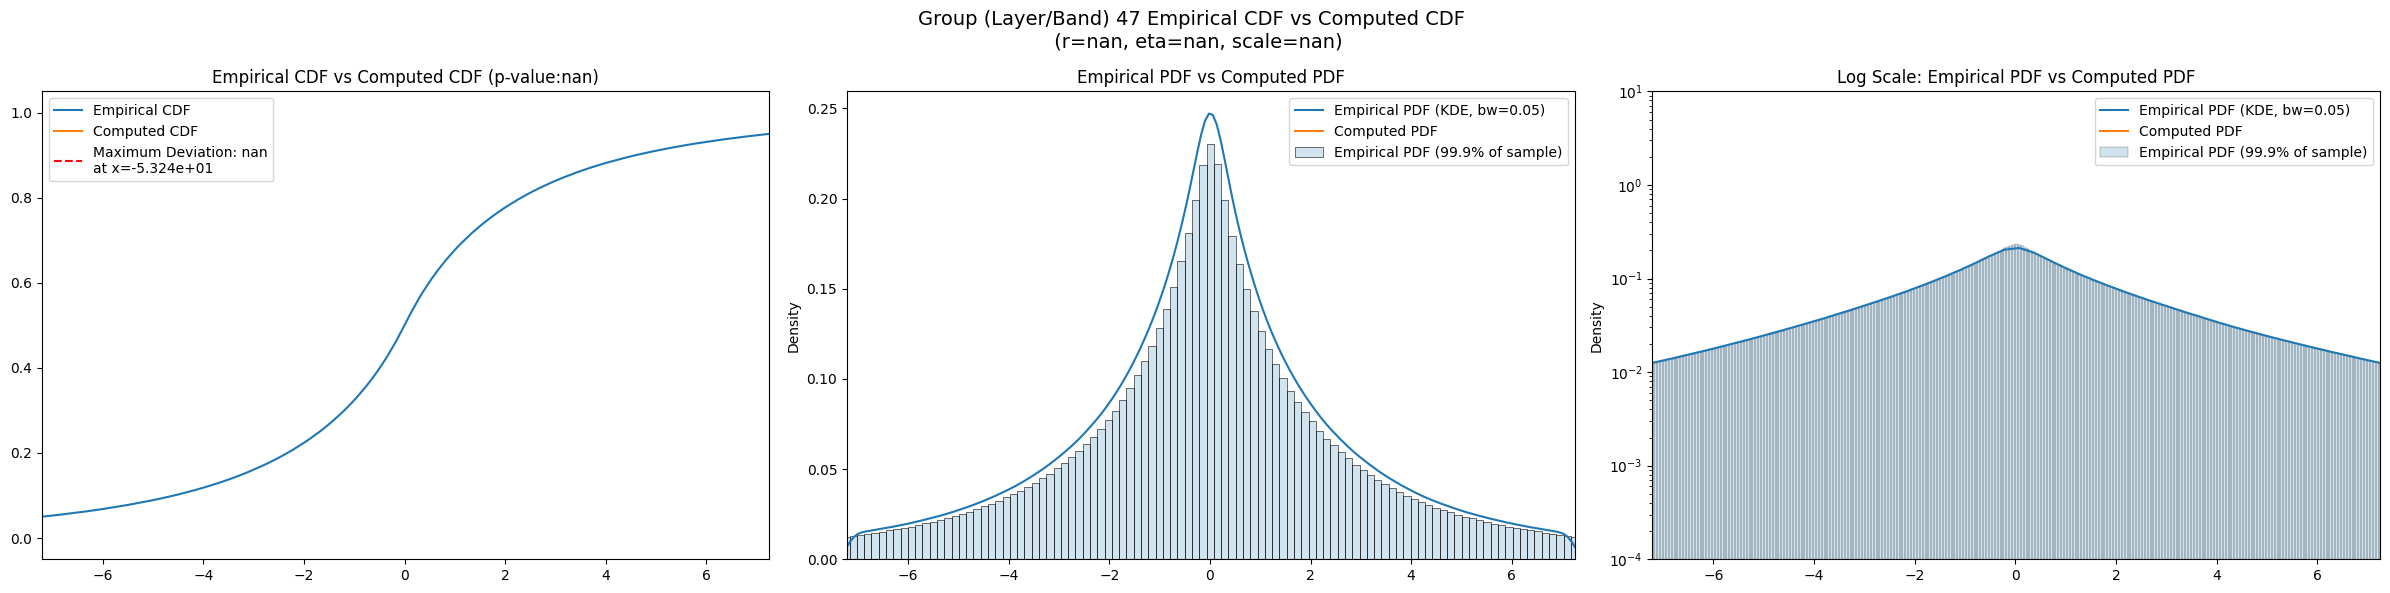

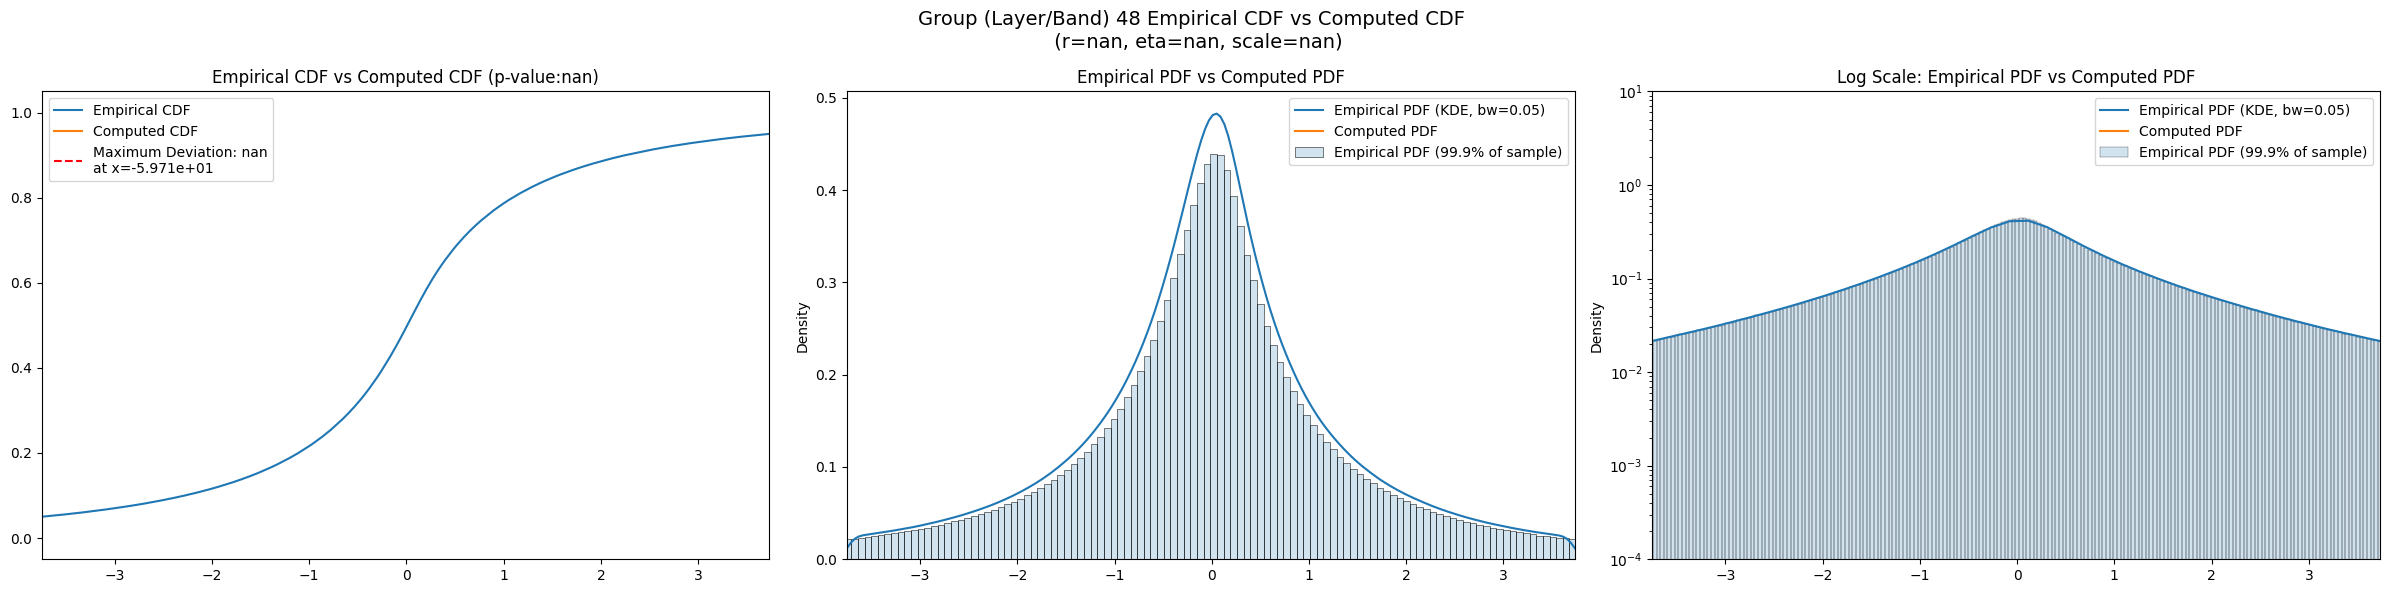

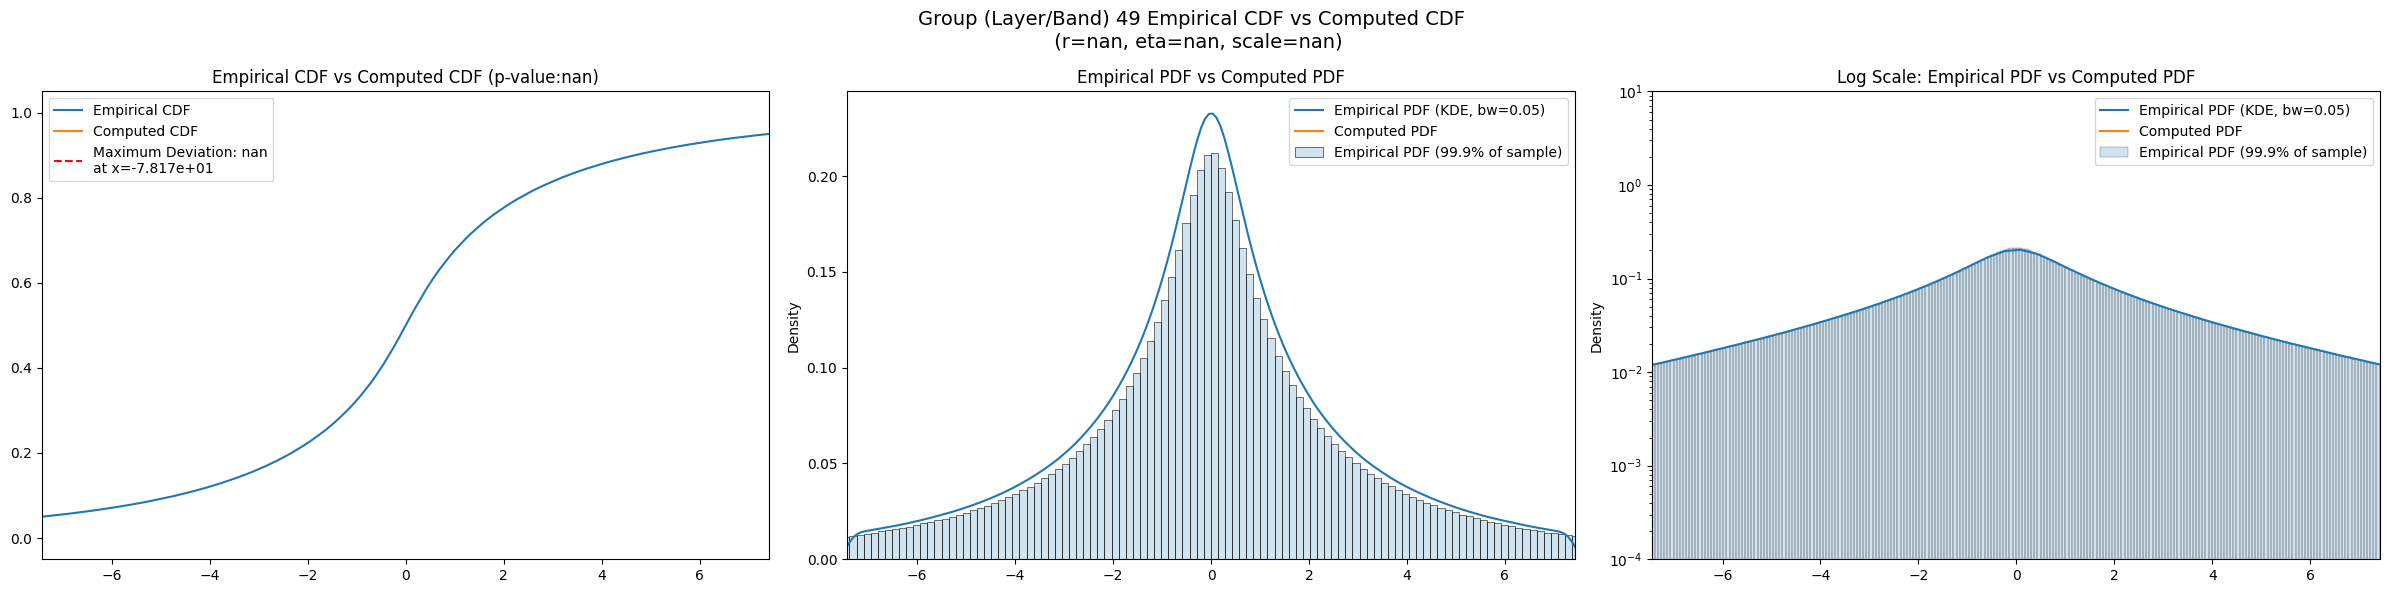

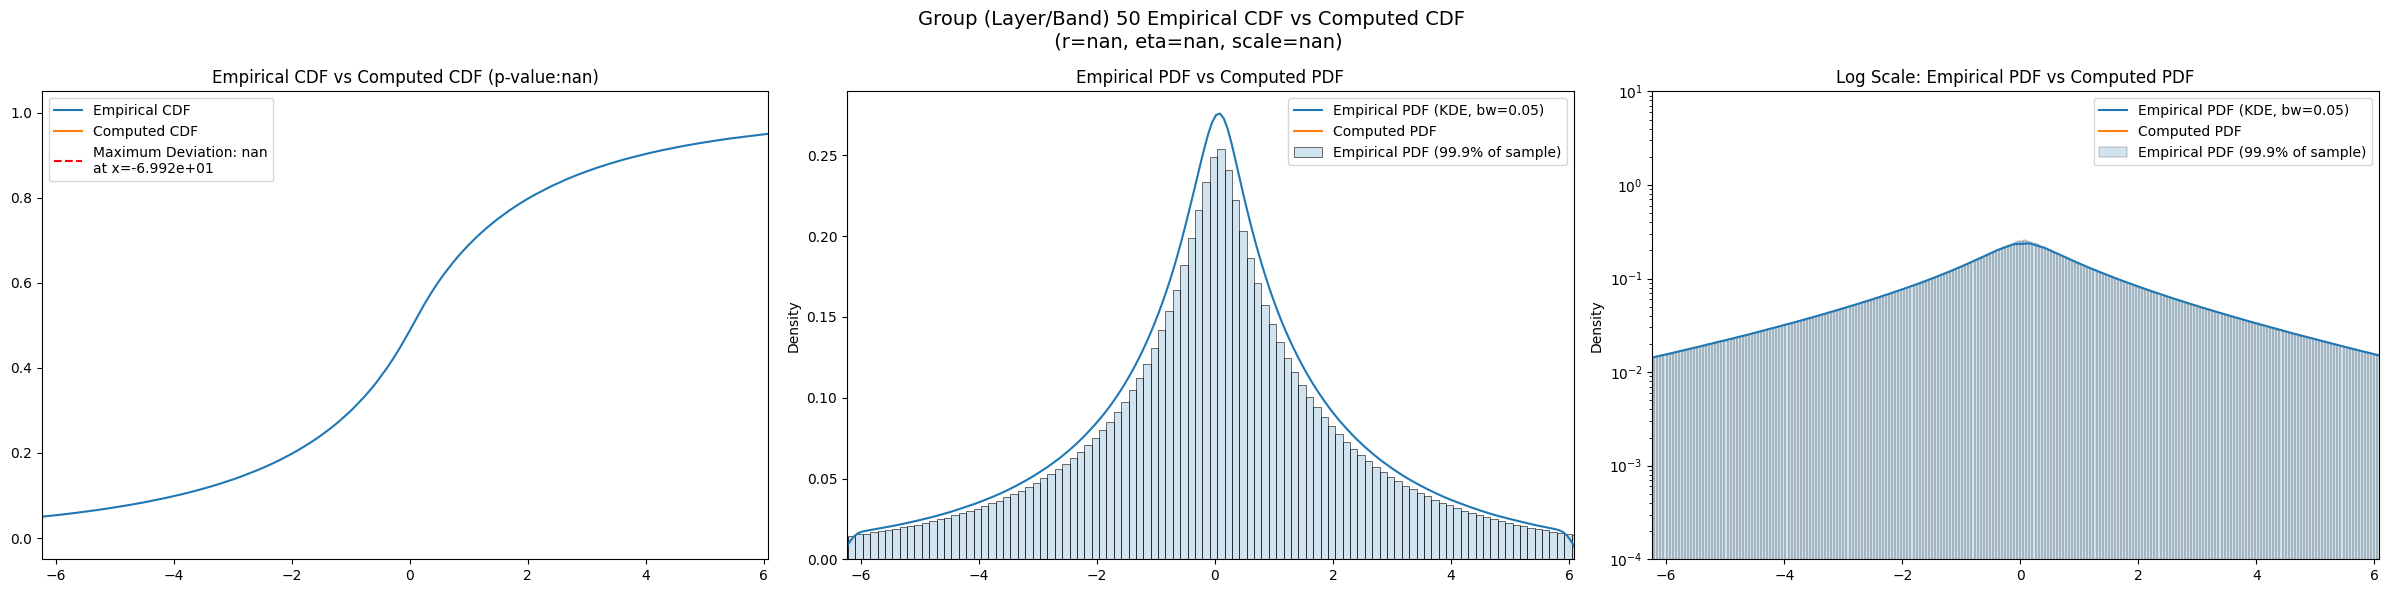

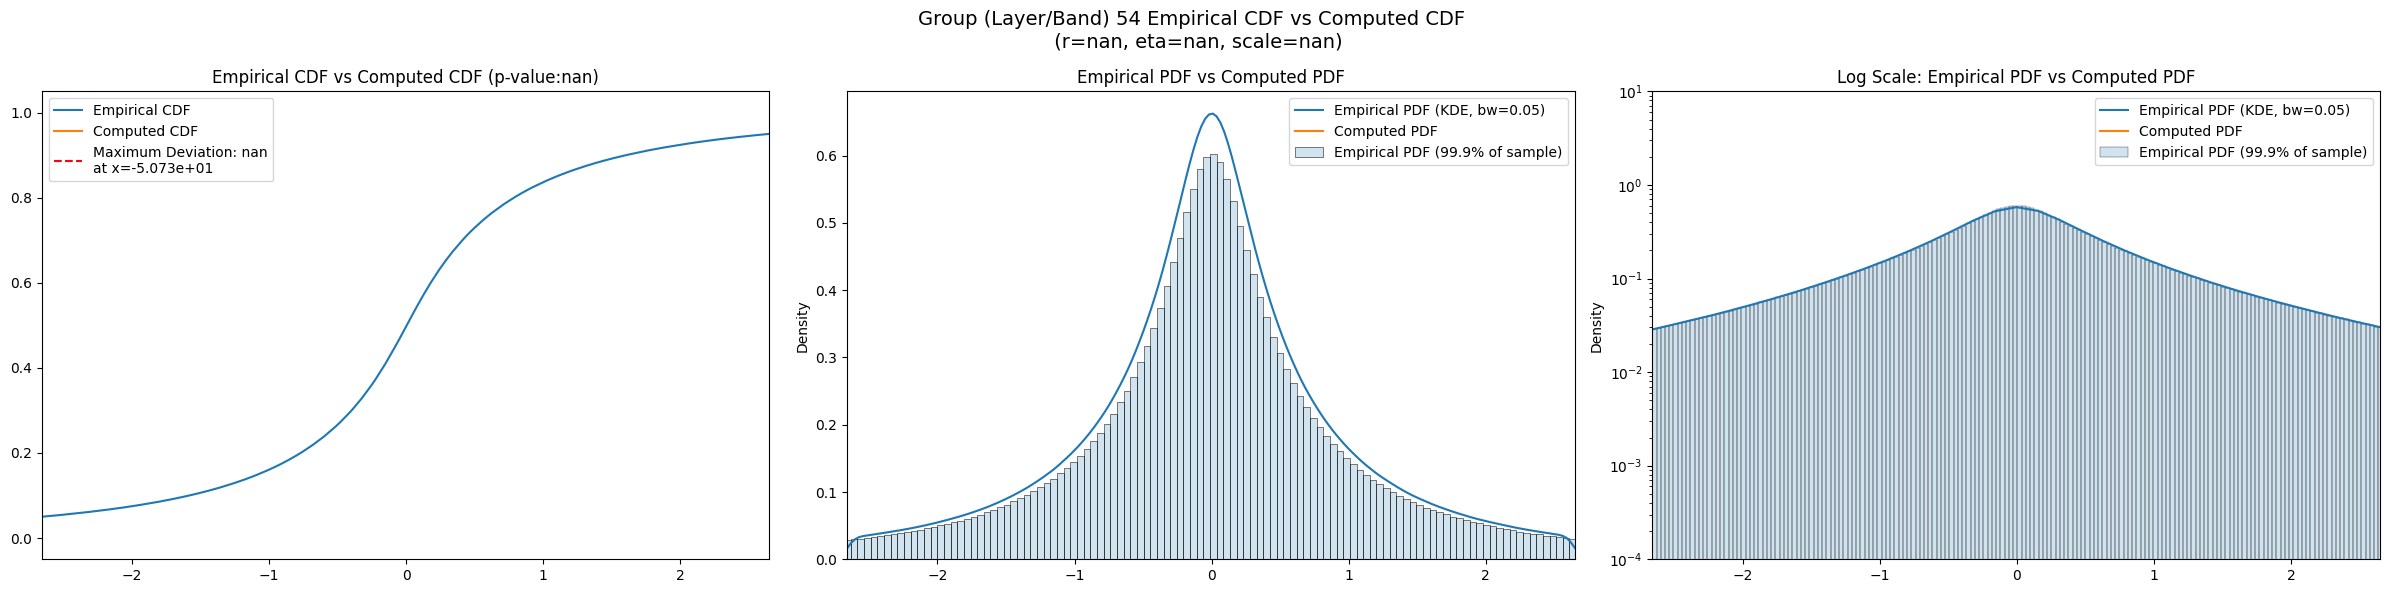

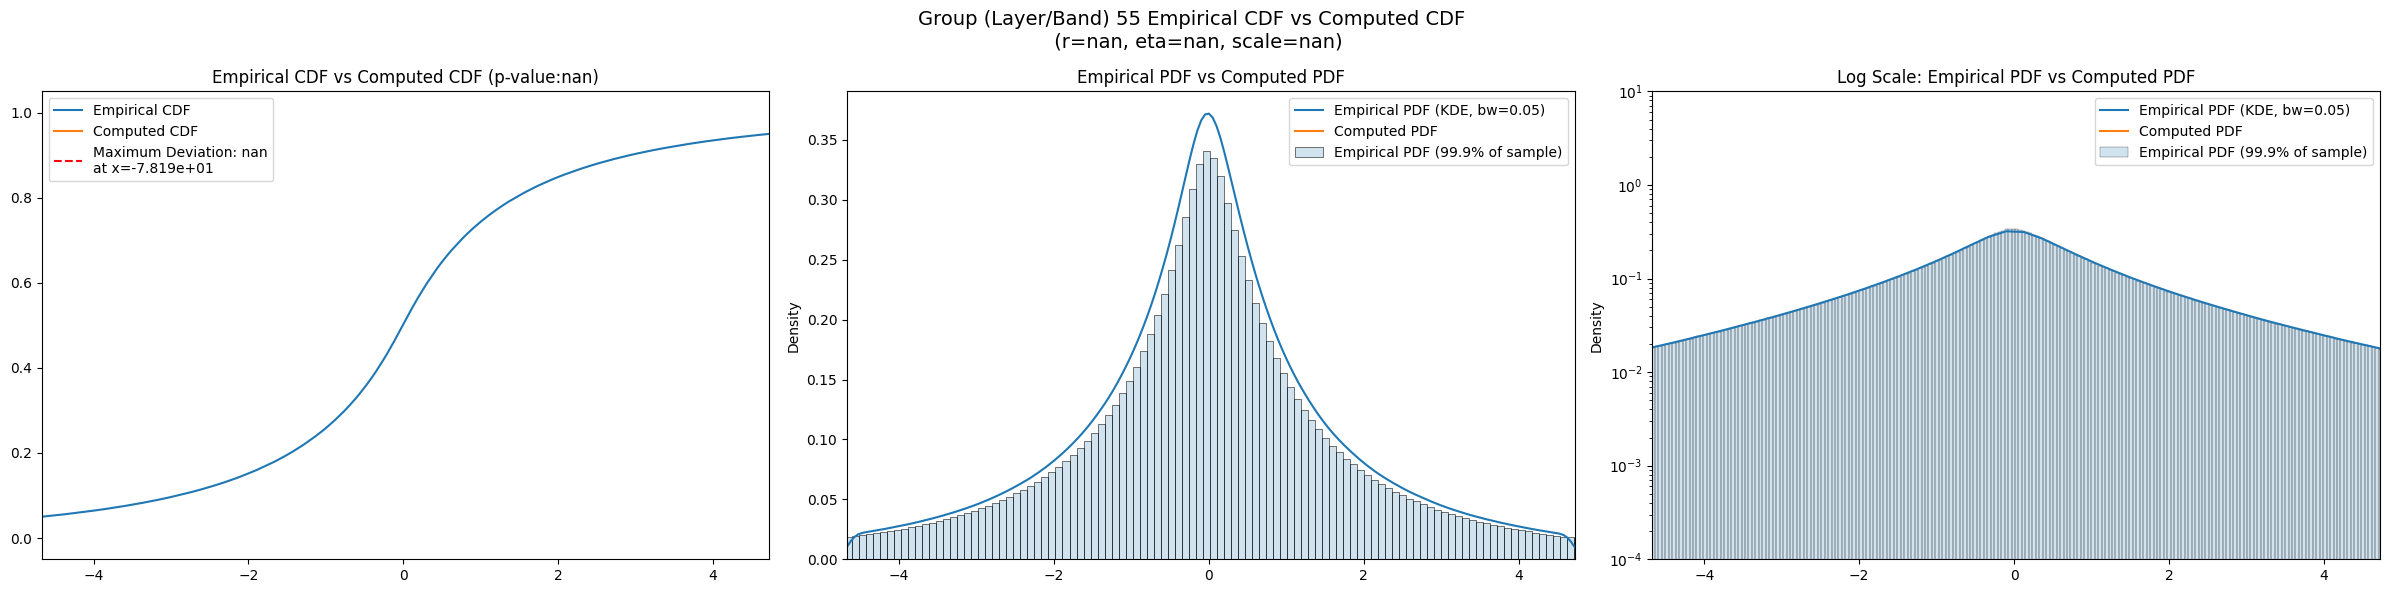

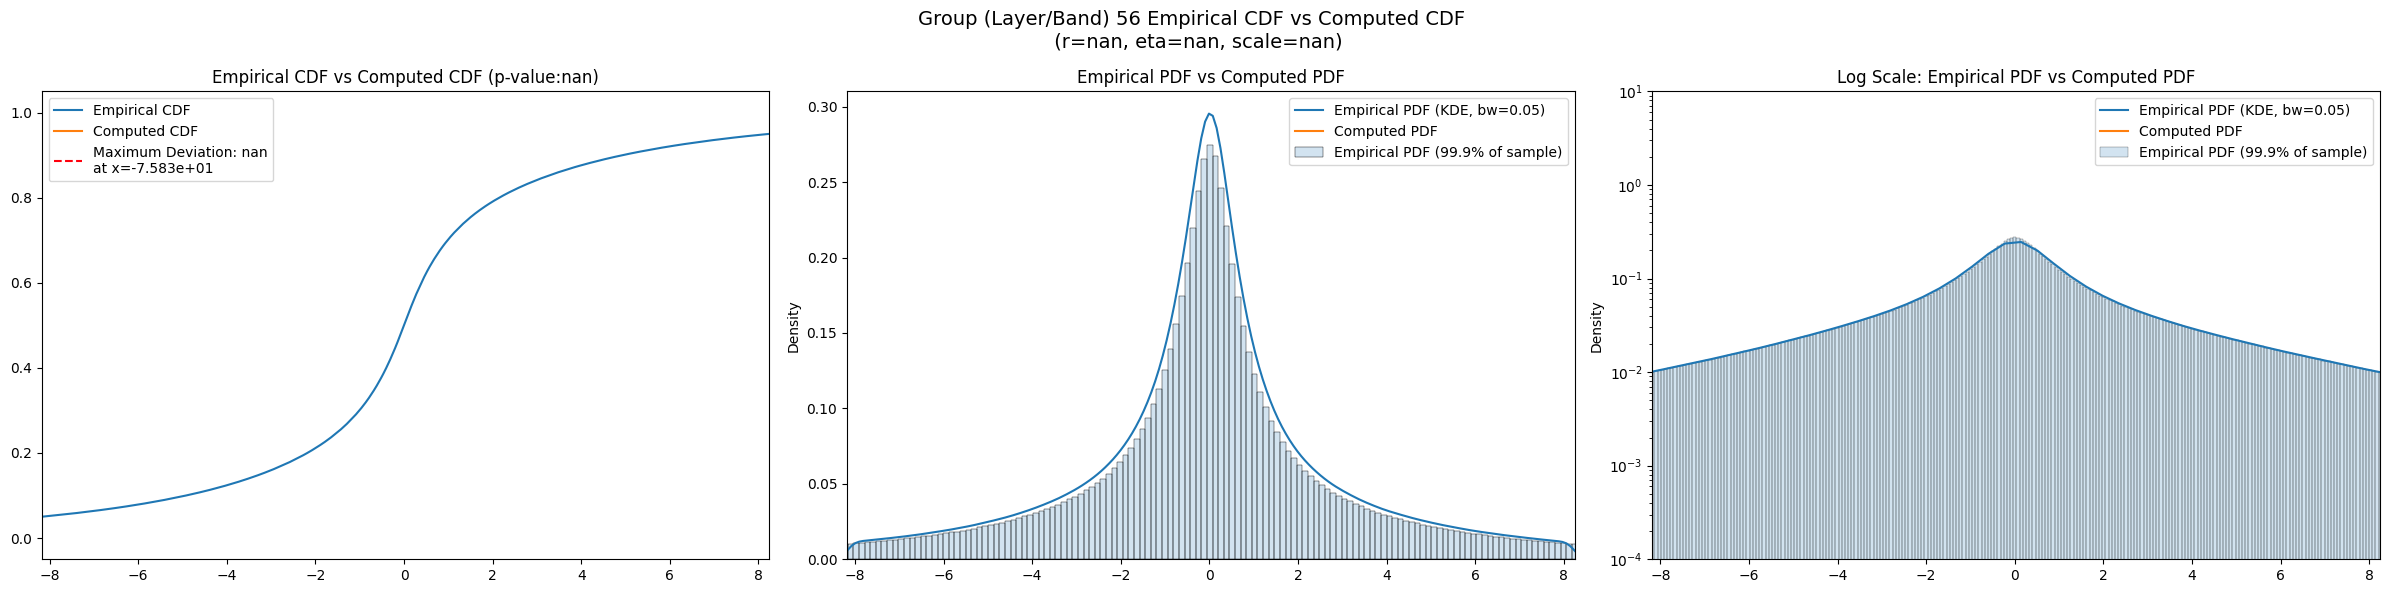

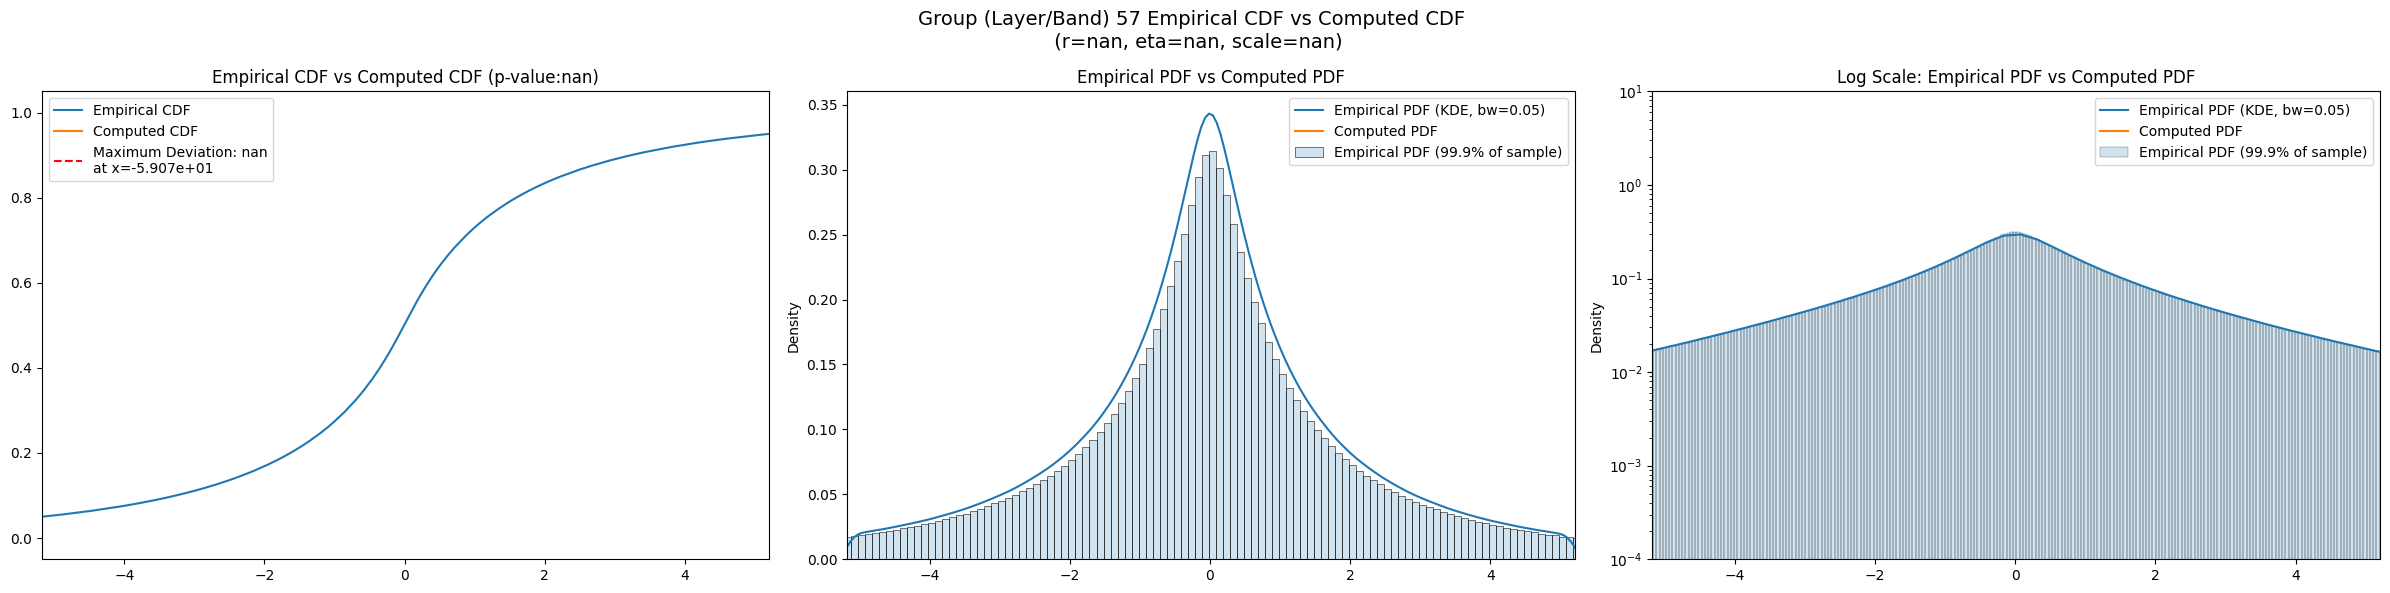

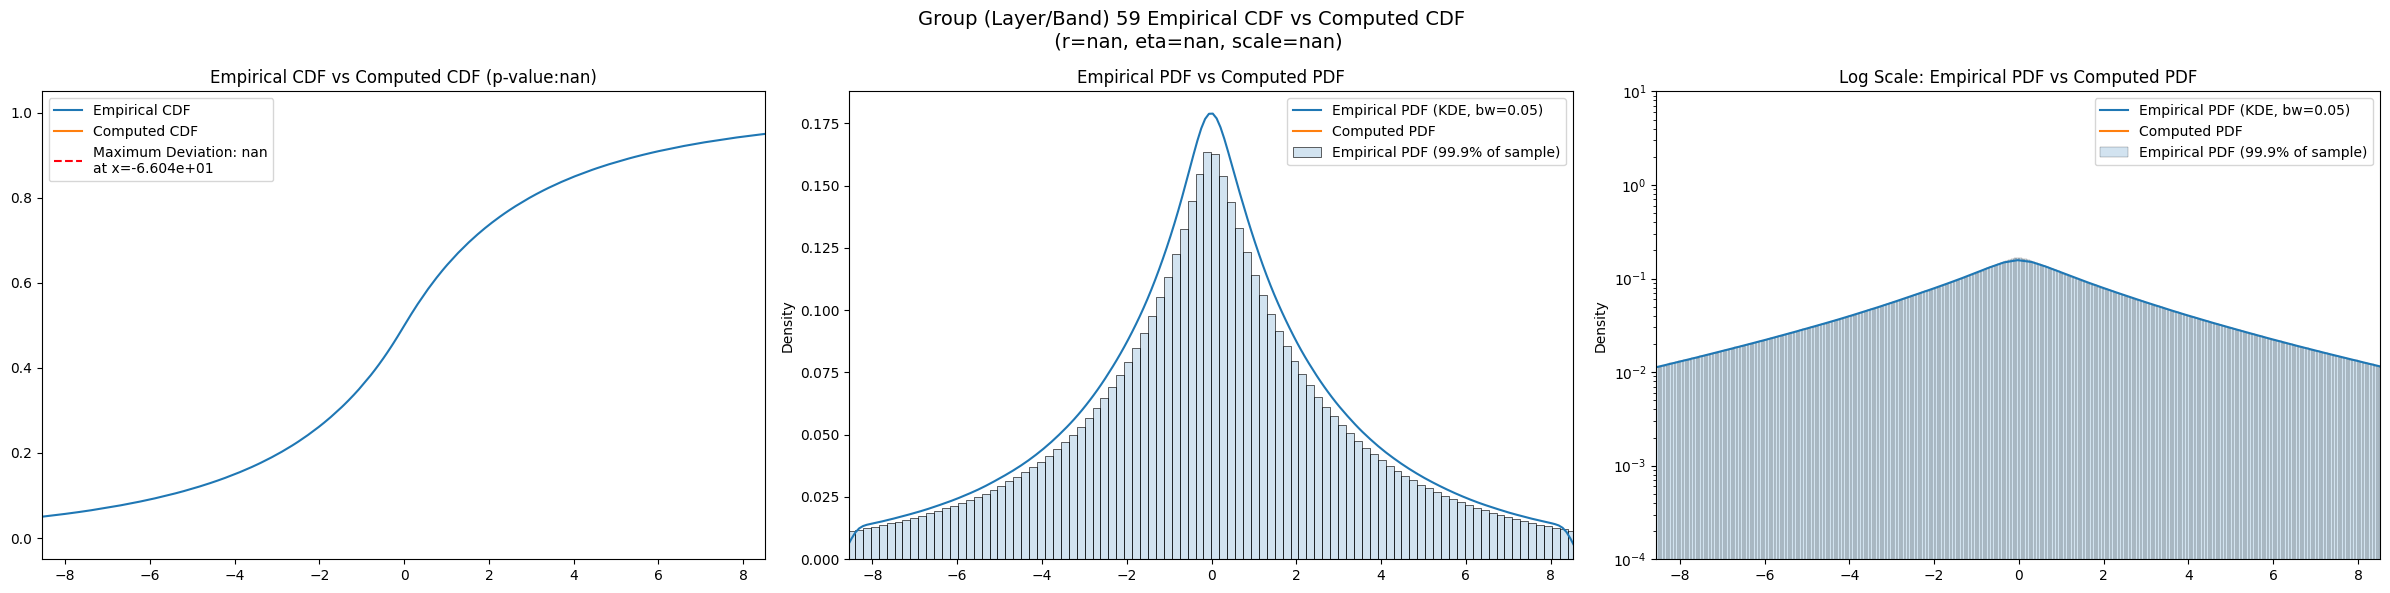

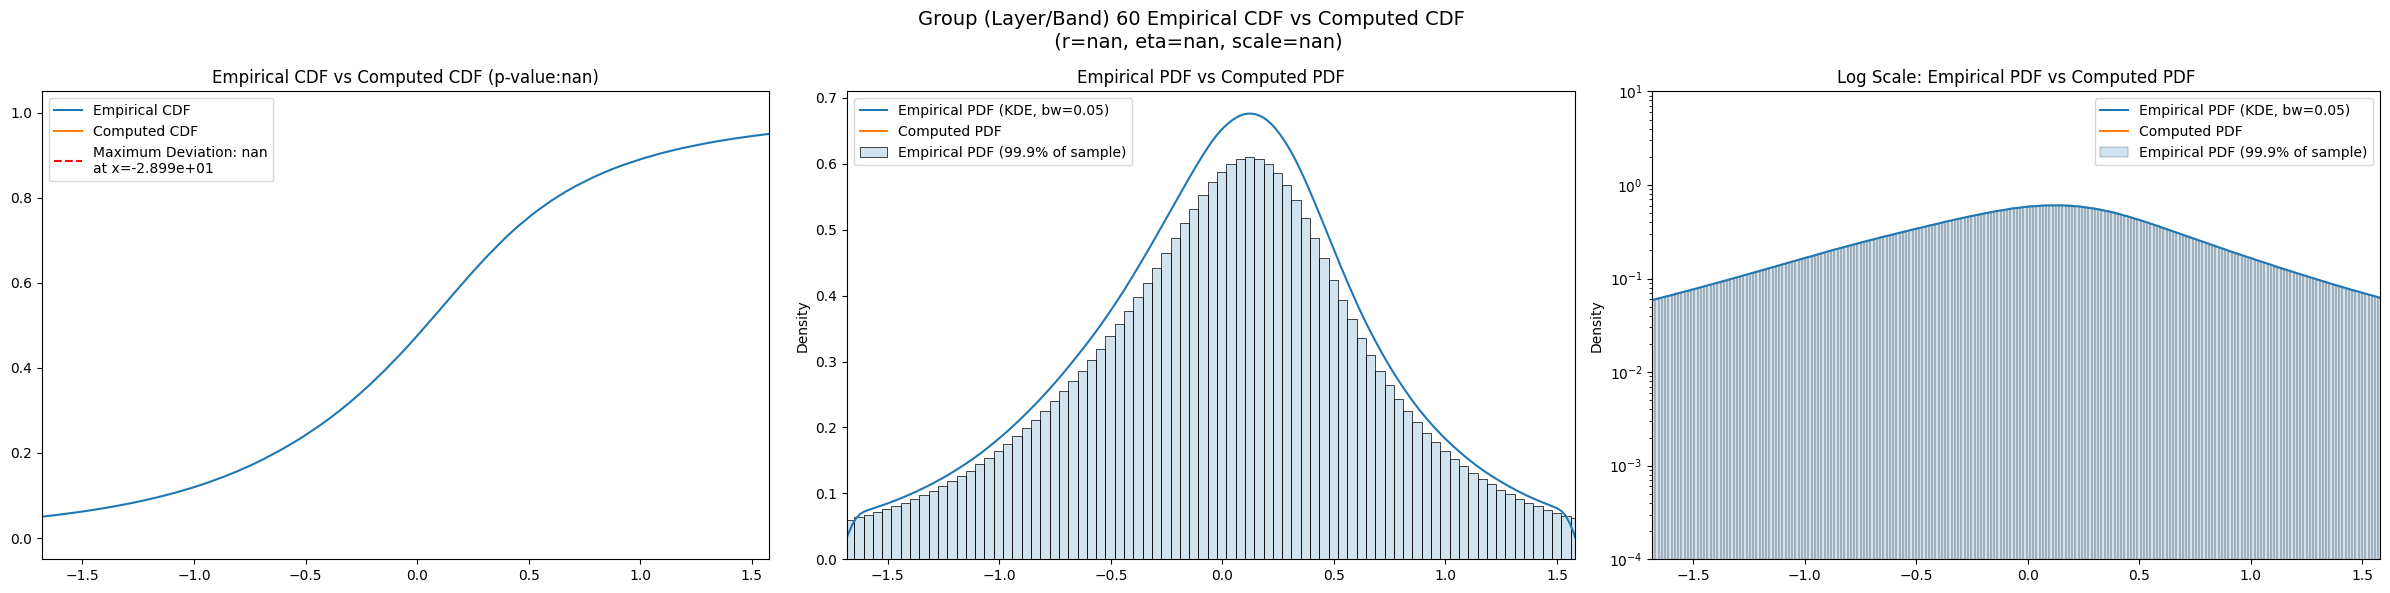

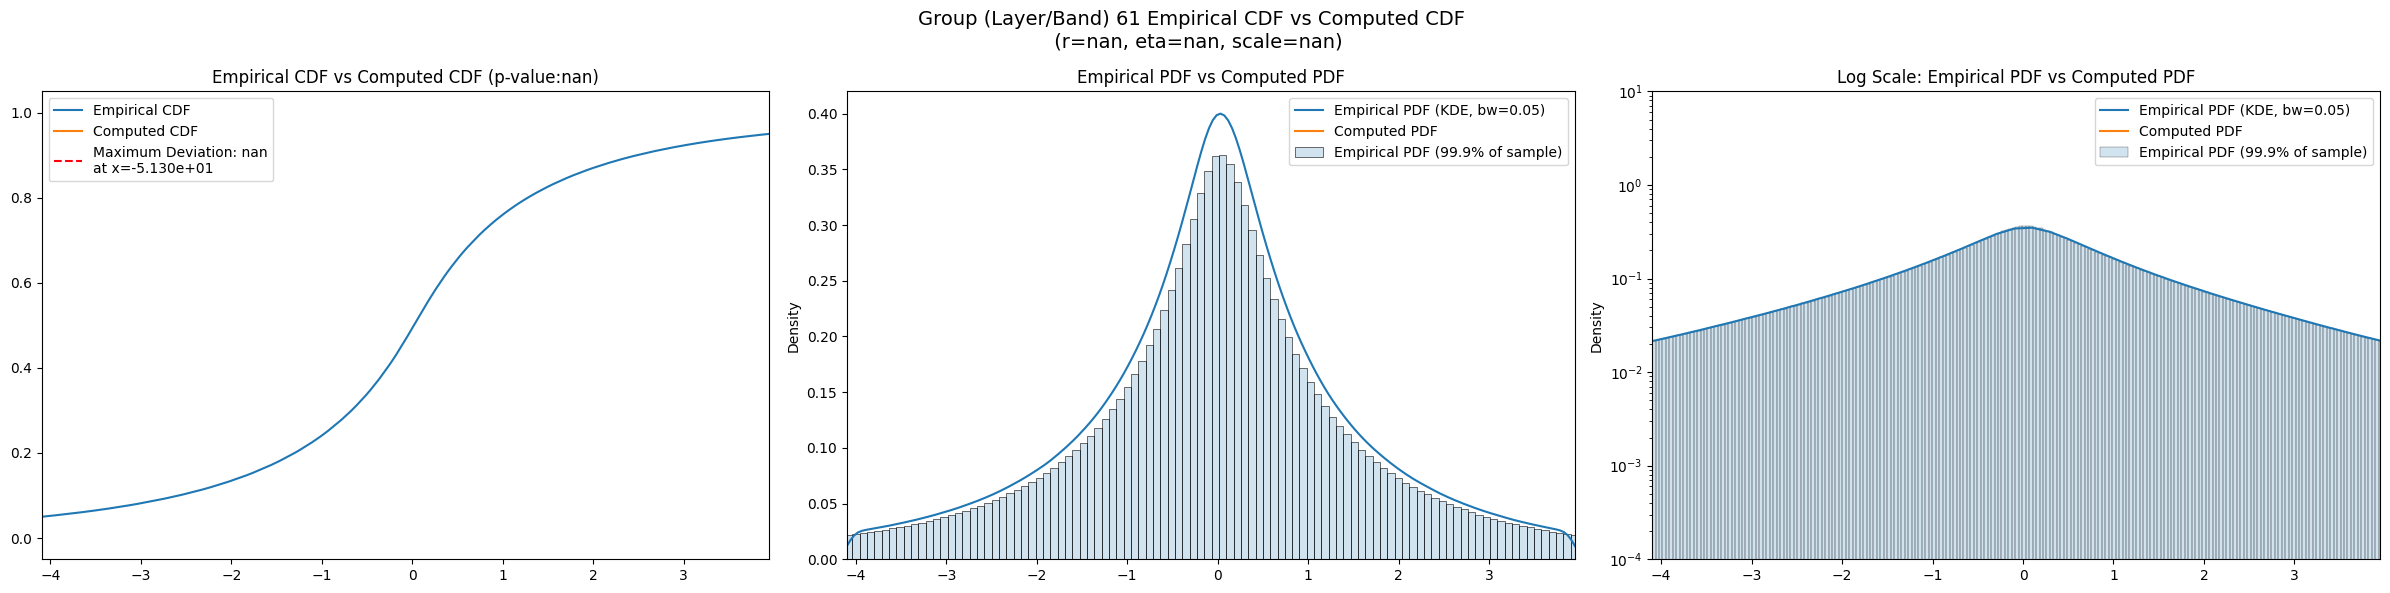

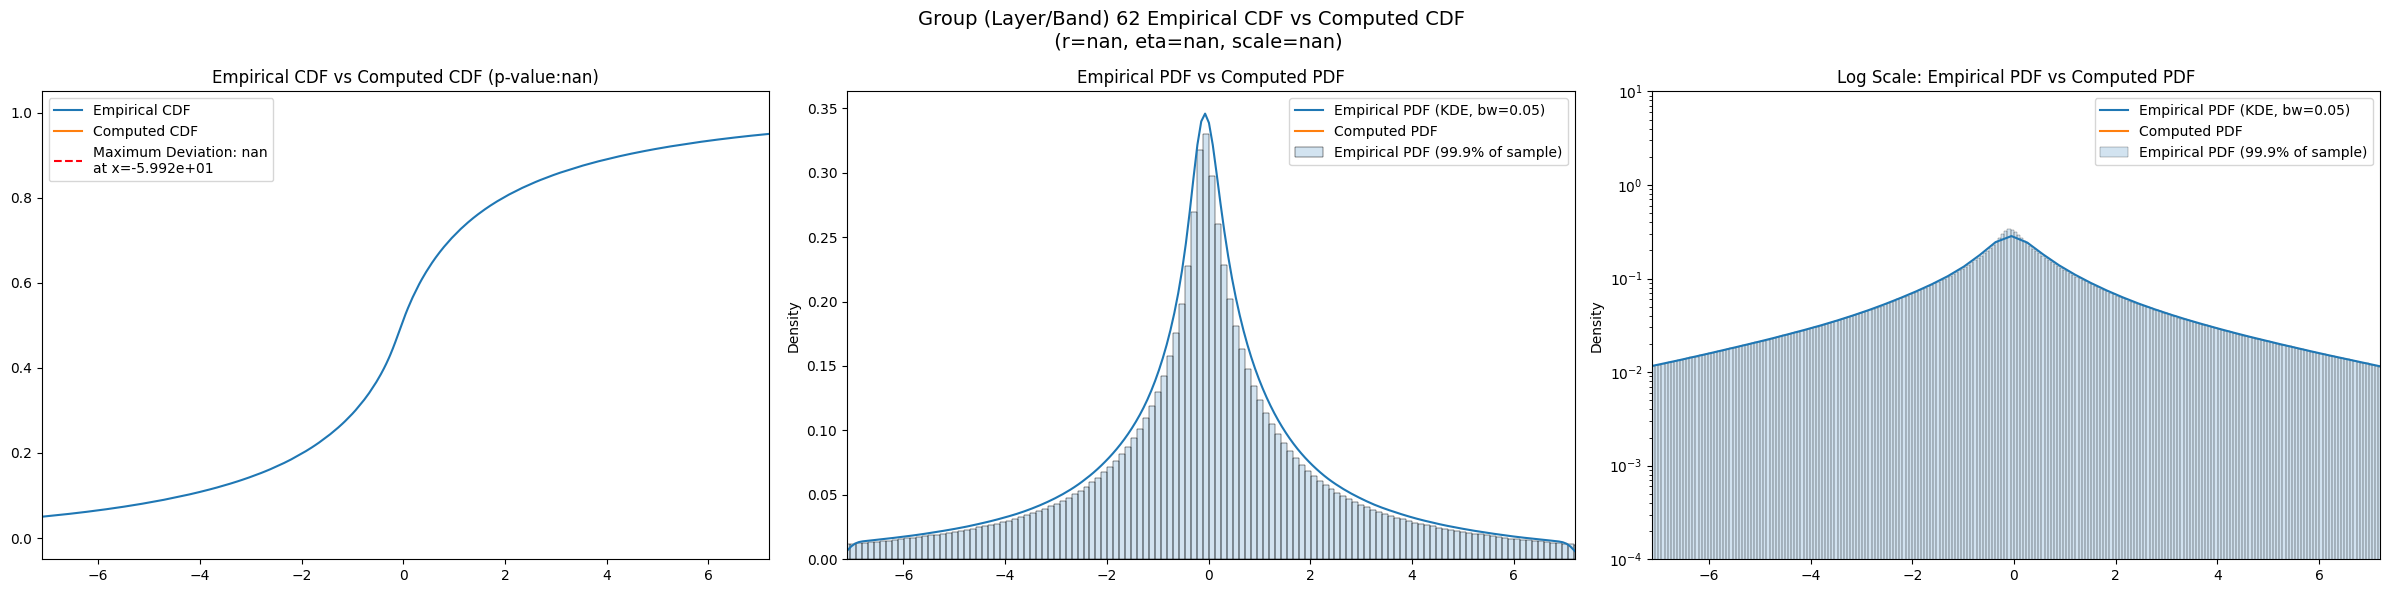

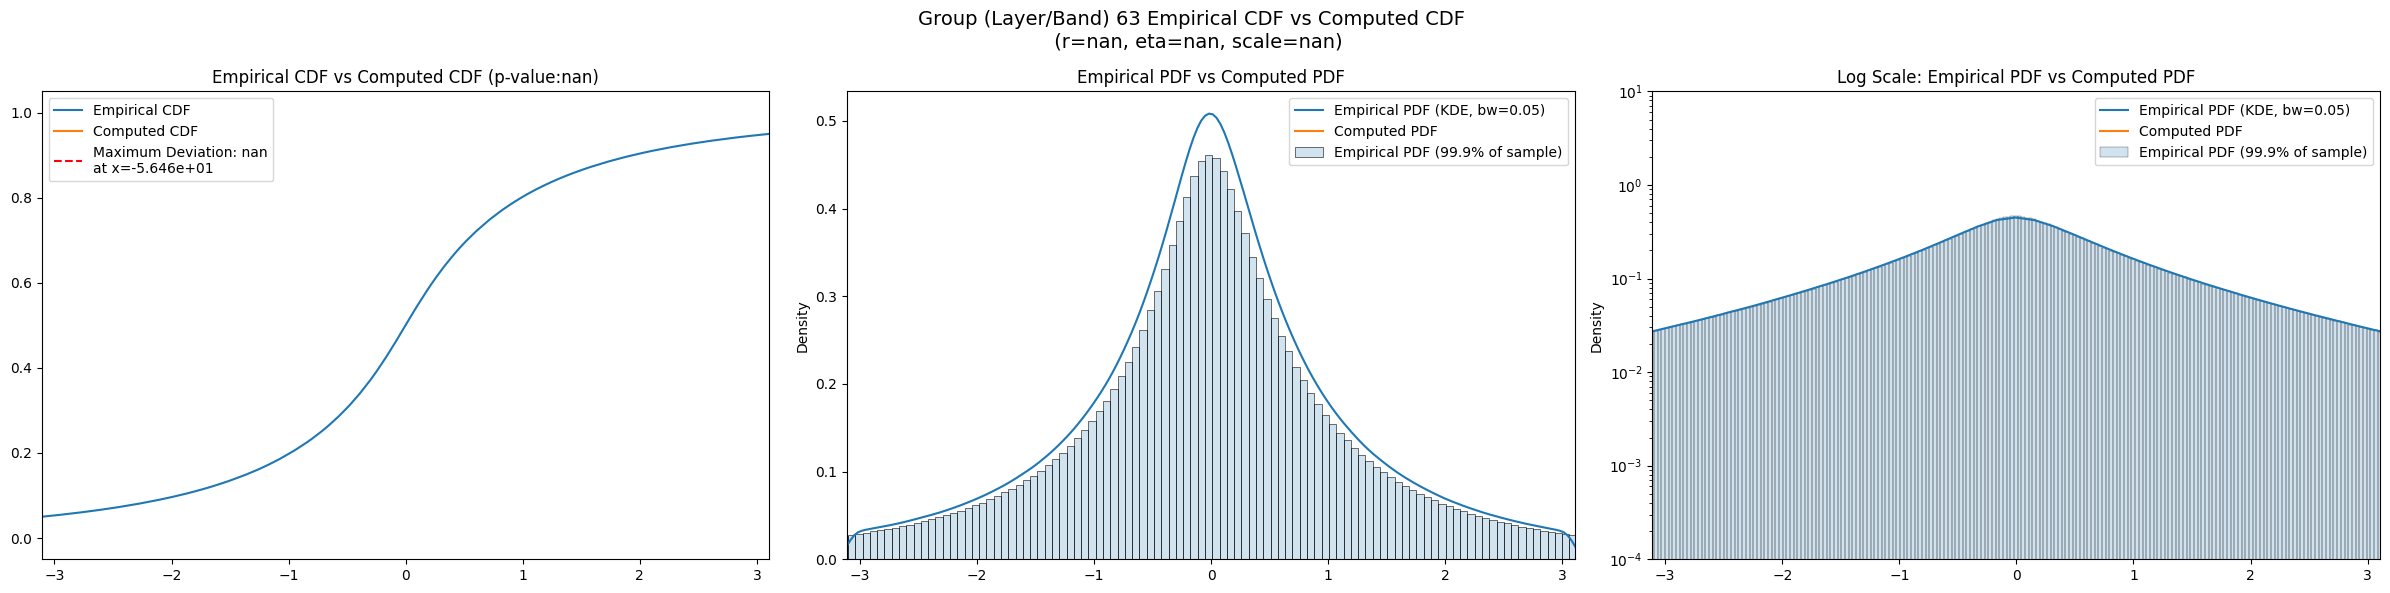

In [ ]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    best_scale = group_info['best_scale']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta, best_scale), 
                    log_scale = True,
                    group = group)
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 100)

## Comparing with Gaussian and Laplace Priors

In [59]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func
    elif distro == 'prior_with_scale':
        def r_eta_scale_func(params):
            r = params[0]
            eta = params[1]
            scale = params[2]
            print(r, eta, scale)
            cdf = compute_prior_cdf(r = r, eta = eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample/ np.sqrt(scale), cdf)
        return r_eta_scale_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior','prior_with_scale', 't'")

In [ ]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        if len(group_data_map[group]) == 0:
            continue
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

obs_var  var_lower  var_upper   obs_kurt  kurt_lower  \
filter_idx                                                           
2           34.369506  24.605825  45.563077  12.809655    5.613093   
3            9.211916   6.612517  15.279208  18.242905    4.943056   
4           38.920789  29.747966  50.861319   8.496136    3.811602   
5           27.970494  22.083296  34.348442   6.381212    3.225396   
6           15.521845  12.091264  21.518831   8.538402    3.097292   
9            4.317211   3.045586   7.122922  22.310000    5.471781   
10          11.440036   8.808161  15.865008  11.033457    3.651032   
11          14.347531  10.770896  19.583105  11.965410    4.279791   
12           9.335676   6.845164  14.472109  15.951739    4.495079   
13          11.160018   8.296117  17.407092  17.105435    4.601159   
16           8.163742   6.024112  14.789858  19.376951    4.503508   
17          23.045648  17.963574  30.128128   8.452885    4.445432   
18           7.202971   5.140224  11.882575  20.105969    5.044514   
20          35.028681  26.764791  44.997309  10.073999    5.211343   
22           8.077166   5.918871  12.748697  17.238976    4.136479   
24          10.146336   7.410541  17.096828  20.697992    5.199245   
25           4.769784   3.341078   8.924028  26.282440    6.024841   
27           5.222127   3.707689   9.588633  21.987287    5.206835   
30           9.075805   6.489488  15.577917  20.403324    5.269262   
33           6.794106   4.730028  11.038863  19.508541    4.780932   
34           8.665593   6.077943  13.093413  17.288806    4.902694   
38          26.123849  20.100091  34.645801  11.346393    4.641487   
41          10.190199   7.292673  16.090762  17.399572    4.701840   
42          31.897779  22.088501  44.869786  16.700681    8.069232   
44          24.231690  18.541795  33.208879  14.756328    5.216417   
47          22.210125  17.083923  27.940938   7.521260    3.589910   
48           6.889047   5.017999  10.716170  17.715041    5.426988   
49          24.390207  18.687427  32.601924  10.321610    4.061237   
50          16.650869  12.538569  22.252991   9.637120    3.703745   
54           3.879771   2.680624   7.489711  28.982914    6.201604   
55          10.486008   7.748296  16.921532  18.340766    4.441163   
56          29.517911  21.927102  39.315876  10.623308    4.493128   
57          12.287432   9.175981  19.151669  13.393076    4.489554   
59          29.978300  23.762365  38.086785   6.454924    2.866552   
60           1.251381   0.956284   2.337485  19.603682    3.102122   
61           7.650374   5.747149  11.672561  14.304929    4.381281   
62          22.477930  17.227475  28.672997   9.491768    4.780817   
63           4.819722   3.375008   9.476690  27.452317    4.998286   

            kurt_upper  total_samples  kstest_stat_initial  initial_r  \
filter_idx                                                              
2            50.100223     78151680.0             0.004488        0.1   
3           134.972735     78151680.0             1.000000        NaN   
4            24.288728     78151680.0                  NaN        NaN   
5            19.805721     78151680.0                  NaN        NaN   
6            72.753520     78151680.0                  NaN        NaN   
9           156.300151     78151680.0                  NaN        NaN   
10           95.864711     78151680.0                  NaN        NaN   
11          103.517830     78151680.0                  NaN        NaN   
12          122.255776     78151680.0                  NaN        NaN   
13          150.858430     78151680.0                  NaN        NaN   
16          184.688366     78151680.0                  NaN        NaN   
17           24.189184     78151680.0                  NaN        NaN   
18          156.725215     78151680.0                  NaN        NaN   
20           24.769730     78151680.0                  NaN        NaN   
22          143.530326     78151680.0        

## Results

In [62]:
import pandas as pd
import os
master_df = pd.read_csv(os.path.join(os.getcwd(), "CSVs", 'master_df.csv'), index_col = 0)

In [63]:
master_df.filter(regex="kstest_stat.*")

kstest_stat_initial  kstest_stat_cutoff_0.05  kstest_stat_best  \
filter_idx                                                                   
2                      0.004488                 0.000154          0.004021   
3                      1.000000                      NaN          1.000000   
4                           NaN                      NaN               NaN   
5                           NaN                      NaN               NaN   
6                           NaN                      NaN               NaN   
9                           NaN                      NaN               NaN   
10                          NaN                      NaN               NaN   
11                          NaN                      NaN               NaN   
12                          NaN                      NaN               NaN   
13                          NaN                      NaN               NaN   
16                          NaN                      NaN               NaN   
17                          NaN                      NaN               NaN   
18                          NaN                      NaN               NaN   
20                          NaN                      NaN               NaN   
22                          NaN                      NaN               NaN   
24                          NaN                      NaN               NaN   
25                          NaN                      NaN               NaN   
27                          NaN                      NaN               NaN   
30                          NaN                      NaN               NaN   
33                          NaN                      NaN               NaN   
34                          NaN                      NaN               NaN   
38                          NaN                      NaN               NaN   
41                          NaN                      NaN               NaN   
42                          NaN                      NaN               NaN   
44                          NaN                      NaN               NaN   
47                          NaN                      NaN               NaN   
48                          NaN                      NaN               NaN   
49                          NaN                      NaN               NaN   
50                          NaN                      NaN               NaN   
54                          NaN                      NaN               NaN   
55                          NaN                      NaN               NaN   
56                          NaN                      NaN               NaN   
57                          NaN                      NaN               NaN   
59                          NaN                      NaN               NaN   
60                          NaN                      NaN               NaN   
61                          NaN                      NaN               NaN   
62                          NaN                      NaN               NaN   
63                          NaN                      NaN               NaN   

            kstest_stat_gaussian  kstest_stat_laplace  kstest_stat_t  
filter_idx                                                            
2                       0.048640             0.021544       0.020900  
3                       0.052604             0.025299       0.025045  
4                       0.048656             0.021061       0.022703  
5                       0.045147             0.017652       0.021357  
6                       0.042826             0.015096       0.017522  
9                       0.049143             0.021789       0.021085  
10                      0.047388             0.019402       0.021718  
11                      0.049805             0.022325       0.023046  
12                      0.048913             0.021423       0.021917  
13                      0.050590             0.022768       0.023950  
16                      0.046366       

In [64]:
master_df.filter(regex="best.*")

best_augmented_var  kstest_stat_best  best_r  best_eta  \
filter_idx                                                           
2                     32.91584          0.004021    0.11       1.7   
3                          NaN          1.000000     NaN       NaN   
4                          NaN               NaN     NaN       NaN   
5                          NaN               NaN     NaN       NaN   
6                          NaN               NaN     NaN       NaN   
9                          NaN               NaN     NaN       NaN   
10                         NaN               NaN     NaN       NaN   
11                         NaN               NaN     NaN       NaN   
12                         NaN               NaN     NaN       NaN   
13                         NaN               NaN     NaN       NaN   
16                         NaN               NaN     NaN       NaN   
17                         NaN               NaN     NaN       NaN   
18                         NaN               NaN     NaN       NaN   
20                         NaN               NaN     NaN       NaN   
22                         NaN               NaN     NaN       NaN   
24                         NaN               NaN     NaN       NaN   
25                         NaN               NaN     NaN       NaN   
27                         NaN               NaN     NaN       NaN   
30                         NaN               NaN     NaN       NaN   
33                         NaN               NaN     NaN       NaN   
34                         NaN               NaN     NaN       NaN   
38                         NaN               NaN     NaN       NaN   
41                         NaN               NaN     NaN       NaN   
42                         NaN               NaN     NaN       NaN   
44                         NaN               NaN     NaN       NaN   
47                         NaN               NaN     NaN       NaN   
48                         NaN               NaN     NaN       NaN   
49                         NaN               NaN     NaN       NaN   
50                         NaN               NaN     NaN       NaN   
54                         NaN               NaN     NaN       NaN   
55                         NaN               NaN     NaN       NaN   
56                         NaN               NaN     NaN       NaN   
57                         NaN               NaN     NaN       NaN   
59                         NaN               NaN     NaN       NaN   
60                         NaN               NaN     NaN       NaN   
61                         NaN               NaN     NaN       NaN   
62                         NaN               NaN     NaN       NaN   
63                         NaN               NaN     NaN       NaN   

              best_scale  best_exclude_cutoff  
filter_idx                                     
2           5.113891e-13                 25.0  
3                    NaN                  NaN  
4                    NaN                  NaN  
5                    NaN                  NaN  
6                    NaN                  NaN  
9                    NaN                  NaN  
10                   NaN                  NaN  
11                   NaN                  NaN  
12                   NaN                  NaN  
13                   NaN                  NaN  
16                   NaN                  NaN  
17                   NaN                  NaN  
18                   NaN                  NaN  
20                   NaN                  NaN  
22                   NaN                  NaN  
24                   NaN                  NaN  
25                   NaN                  NaN  
27                   NaN                  NaN  
30                   NaN                  NaN  
33                   NaN                  NaN  
34                   NaN                  NaN  
38                   NaN                  NaN  
41                   NaN                  NaN  
42         